In [304]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Ensemble methods
from xgboost import XGBClassifier  # Extreme Gradient Boosting
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron

# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
sns.set()  # Set Seaborn default style
plt.style.use('ggplot')  # Set ggplot style for matplotlib


In [305]:
#import  traain dataset
df = pd.read_csv("training data.csv")

df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [306]:
df.shape
#17998 raws and 25 columns

(17998, 25)

In [307]:
df.columns

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud'],
      dtype='object')

In [308]:
df.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [309]:
#finding count of missing values in each column
df.isna().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [310]:
#finding mean of missing values in each column
df.isna().mean()

claim_number               0.000000
age_of_driver              0.000000
gender                     0.000000
marital_status             0.000278
safty_rating               0.000000
annual_income              0.000000
high_education_ind         0.000000
address_change_ind         0.000000
living_status              0.000000
zip_code                   0.000000
claim_date                 0.000000
claim_day_of_week          0.000000
accident_site              0.000000
past_num_of_claims         0.000000
witness_present_ind        0.007334
liab_prct                  0.000000
channel                    0.000000
policy_report_filed_ind    0.000000
claim_est_payout           0.000945
age_of_vehicle             0.000444
vehicle_category           0.000000
vehicle_price              0.000000
vehicle_color              0.000000
vehicle_weight             0.000000
fraud                      0.000000
dtype: float64

In [311]:
df.dropna(inplace=True)
#the number of missing values is relatively small,  can remove the rows that contain them.

In [312]:
#finding count of missing values in each column
df.isna().sum()

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64

In [313]:
#identifying if there are duplicates
duplicates = df.duplicated().all()
print(duplicates)

False


In [314]:
df

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.452350,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.452180,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.181950,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.273440,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.211220,gray,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,29993,69,M,1.0,93,42338,1,0,Own,15012,...,99,Broker,0,4806.841803,6.0,Medium,32144.571850,black,16868.53410,0
17994,29996,35,F,0.0,22,35579,1,1,Own,20111,...,94,Phone,1,4089.794471,3.0,Medium,9468.510601,blue,31500.99689,1
17995,29997,27,F,1.0,81,32953,0,1,Rent,15012,...,1,Online,1,2225.803056,5.0,Medium,64974.369590,black,44536.25506,0
17996,29999,52,F,1.0,86,39519,1,0,Own,15026,...,75,Broker,1,9560.744844,3.0,Compact,24983.268110,white,50093.75959,0


In [315]:
# Check the number of unique values in each column
unique_values = df.nunique()
print(unique_values)

claim_number               17836
age_of_driver                 87
gender                         2
marital_status                 2
safty_rating                 100
annual_income               2684
high_education_ind             2
address_change_ind             2
living_status                  2
zip_code                     276
claim_date                   731
claim_day_of_week              7
accident_site                  3
past_num_of_claims             7
witness_present_ind            2
liab_prct                    101
channel                        3
policy_report_filed_ind        2
claim_est_payout           17836
age_of_vehicle                17
vehicle_category               3
vehicle_price              17836
vehicle_color                  7
vehicle_weight             17836
fraud                          2
dtype: int64


In [316]:
#claim number is the unique identification number hence we remove it
df.drop(columns=['claim_number'], inplace=True)
df

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,M,1.0,85,38301,1,1,Rent,80006,12/16/2016,...,74,Broker,0,7530.940993,9.0,Compact,12885.452350,white,16161.33381,0
1,21,F,0.0,75,30445,0,1,Rent,15021,2/12/2015,...,79,Online,0,2966.024895,4.0,Large,29429.452180,white,28691.96422,0
2,49,F,0.0,87,38923,0,1,Own,20158,12/6/2016,...,0,Broker,0,6283.888333,3.0,Compact,21701.181950,white,22090.94758,1
3,58,F,1.0,58,40605,1,0,Own,15024,5/5/2016,...,99,Broker,1,6169.747994,4.0,Medium,13198.273440,other,38329.58106,1
4,38,M,1.0,95,36380,1,0,Rent,50034,10/27/2015,...,7,Broker,0,4541.387150,7.0,Medium,38060.211220,gray,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,69,M,1.0,93,42338,1,0,Own,15012,3/28/2015,...,99,Broker,0,4806.841803,6.0,Medium,32144.571850,black,16868.53410,0
17994,35,F,0.0,22,35579,1,1,Own,20111,1/5/2015,...,94,Phone,1,4089.794471,3.0,Medium,9468.510601,blue,31500.99689,1
17995,27,F,1.0,81,32953,0,1,Rent,15012,9/10/2016,...,1,Online,1,2225.803056,5.0,Medium,64974.369590,black,44536.25506,0
17996,52,F,1.0,86,39519,1,0,Own,15026,12/25/2015,...,75,Broker,1,9560.744844,3.0,Compact,24983.268110,white,50093.75959,0


In [317]:
# Check the data types of each column
print(df.dtypes)

age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_date                  object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
fraud                        int64
dtype: object


In [318]:
# checking the unique levels and their counts

In [319]:
unique_genders = df['gender'].unique()
print(unique_genders)

['M' 'F']


In [320]:
unique_living_status= df['living_status'].unique()
print(unique_living_status)

['Rent' 'Own']


In [321]:
unique_claim_day_of_week= df['claim_day_of_week'].unique()
print(unique_claim_day_of_week)

['Friday' 'Thursday' 'Tuesday' 'Wednesday' 'Saturday' 'Monday' 'Sunday']


In [322]:
df['claim_date'] = pd.to_datetime(df['claim_date'], format='%m/%d/%Y')

# Extract Month, Day, and Year into new columns
df['Month'] = df['claim_date'].dt.month
df['Day'] = df['claim_date'].dt.day
df['Year'] = df['claim_date'].dt.year

df.drop(columns=['claim_date'], inplace=True)

In [323]:
df

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_day_of_week,...,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,Month,Day,Year
0,46,M,1.0,85,38301,1,1,Rent,80006,Friday,...,7530.940993,9.0,Compact,12885.452350,white,16161.33381,0,12,16,2016
1,21,F,0.0,75,30445,0,1,Rent,15021,Thursday,...,2966.024895,4.0,Large,29429.452180,white,28691.96422,0,2,12,2015
2,49,F,0.0,87,38923,0,1,Own,20158,Tuesday,...,6283.888333,3.0,Compact,21701.181950,white,22090.94758,1,12,6,2016
3,58,F,1.0,58,40605,1,0,Own,15024,Thursday,...,6169.747994,4.0,Medium,13198.273440,other,38329.58106,1,5,5,2016
4,38,M,1.0,95,36380,1,0,Rent,50034,Tuesday,...,4541.387150,7.0,Medium,38060.211220,gray,25876.56319,0,10,27,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,69,M,1.0,93,42338,1,0,Own,15012,Saturday,...,4806.841803,6.0,Medium,32144.571850,black,16868.53410,0,3,28,2015
17994,35,F,0.0,22,35579,1,1,Own,20111,Monday,...,4089.794471,3.0,Medium,9468.510601,blue,31500.99689,1,1,5,2015
17995,27,F,1.0,81,32953,0,1,Rent,15012,Saturday,...,2225.803056,5.0,Medium,64974.369590,black,44536.25506,0,9,10,2016
17996,52,F,1.0,86,39519,1,0,Own,15026,Friday,...,9560.744844,3.0,Compact,24983.268110,white,50093.75959,0,12,25,2015


In [324]:
# Before adjustment: Check the current data types
print("Before adjustment:")
print(df.dtypes)

Before adjustment:
age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
fraud                        int64
Month                        int32
Day                          int32
Year                         int32
dtype: object


In [325]:
df.columns

Index(['age_of_driver', 'gender', 'marital_status', 'safty_rating',
       'annual_income', 'high_education_ind', 'address_change_ind',
       'living_status', 'zip_code', 'claim_day_of_week', 'accident_site',
       'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud', 'Month', 'Day', 'Year'],
      dtype='object')

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17836 entries, 0 to 17997
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            17836 non-null  int64  
 1   gender                   17836 non-null  object 
 2   marital_status           17836 non-null  float64
 3   safty_rating             17836 non-null  int64  
 4   annual_income            17836 non-null  int64  
 5   high_education_ind       17836 non-null  int64  
 6   address_change_ind       17836 non-null  int64  
 7   living_status            17836 non-null  object 
 8   zip_code                 17836 non-null  int64  
 9   claim_day_of_week        17836 non-null  object 
 10  accident_site            17836 non-null  object 
 11  past_num_of_claims       17836 non-null  int64  
 12  witness_present_ind      17836 non-null  float64
 13  liab_prct                17836 non-null  int64  
 14  channel                  17

In [327]:
# Convert 'high_education_ind' to categorical
df['high_education_ind'] = df['high_education_ind'].astype('category')

marital_status_counts = df['marital_status'].value_counts()
print(marital_status_counts)
df['marital_status'] = df['marital_status'].astype('category')

counts = df['address_change_ind'].value_counts()
print(counts)
df['address_change_ind'] = df['address_change_ind'].astype('category')

df['witness_present_ind'] = df['witness_present_ind'].astype('category')
counts = df['witness_present_ind'].value_counts()
print(counts)

counts = df['living_status'].value_counts()
print(counts)
df['living_status'] = df['living_status'].astype('category')

counts = df['gender'].value_counts()
print(counts)
df['gender'] = df['gender'].astype('category')

counts = df['fraud'].value_counts()
print(counts)
df['fraud'] = df['fraud'].astype('category')


counts = df['policy_report_filed_ind'].value_counts()
print(counts)
df['policy_report_filed_ind'] = df['policy_report_filed_ind'].astype('category')

# After adjustment: Check the updated data types
print("\nAfter adjustment:")
print(df.dtypes)

marital_status
1.0    12711
0.0     5125
Name: count, dtype: int64
address_change_ind
1    10293
0     7543
Name: count, dtype: int64
witness_present_ind
0.0    13689
1.0     4147
Name: count, dtype: int64
living_status
Own     9886
Rent    7950
Name: count, dtype: int64
gender
M    9337
F    8499
Name: count, dtype: int64
fraud
0    15040
1     2796
Name: count, dtype: int64
policy_report_filed_ind
1    10706
0     7130
Name: count, dtype: int64

After adjustment:
age_of_driver                 int64
gender                     category
marital_status             category
safty_rating                  int64
annual_income                 int64
high_education_ind         category
address_change_ind         category
living_status              category
zip_code                      int64
claim_day_of_week            object
accident_site                object
past_num_of_claims            int64
witness_present_ind        category
liab_prct                     int64
channel                   

In [328]:
# Separate continuous and categorical variables
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
Date_Month_Year= df.select_dtypes(include=['int32']).columns
# Create separate DataFrames for continuous and categorical variables
df_continuous = df[continuous_vars]
df_categorical = df[categorical_vars]

# Display the variables
print("Continuous Variables:")
print(continuous_vars)
print("\nCategorical Variables:")
print(categorical_vars)
print("\nDate_Month_Year:")
print(Date_Month_Year)

# Display the first few rows of each DataFrame to verify
#print("\nContinuous Variables DataFrame:")
#print(df_continuous.head())
#print("\nCategorical Variables DataFrame:")
#print(df_categorical.head())

Continuous Variables:
Index(['age_of_driver', 'safty_rating', 'annual_income', 'zip_code',
       'past_num_of_claims', 'liab_prct', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_price', 'vehicle_weight'],
      dtype='object')

Categorical Variables:
Index(['gender', 'marital_status', 'high_education_ind', 'address_change_ind',
       'living_status', 'claim_day_of_week', 'accident_site',
       'witness_present_ind', 'channel', 'policy_report_filed_ind',
       'vehicle_category', 'vehicle_color', 'fraud'],
      dtype='object')

Date_Month_Year:
Index(['Month', 'Day', 'Year'], dtype='object')


In [329]:

X=df.drop(columns=['fraud'])
y=df['fraud']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [330]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [331]:
y

0        0
1        0
2        1
3        1
4        0
        ..
17993    0
17994    1
17995    0
17996    0
17997    0
Name: fraud, Length: 17836, dtype: category
Categories (2, int64): [0, 1]

In [332]:
Continuous_Variables_in_X_train = continuous_vars

In [333]:
Categorical_Variables_in_X_train = [var for var in categorical_vars if var != 'fraud']

In [334]:
# Display the variables
print("Continuous Variables in X_train:")
print(Continuous_Variables_in_X_train)
print("\nCategorical Variables in X train:")
print(Categorical_Variables_in_X_train)
print("\nDate_Month_Year:")
print(Date_Month_Year)

Continuous Variables in X_train:
Index(['age_of_driver', 'safty_rating', 'annual_income', 'zip_code',
       'past_num_of_claims', 'liab_prct', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_price', 'vehicle_weight'],
      dtype='object')

Categorical Variables in X train:
['gender', 'marital_status', 'high_education_ind', 'address_change_ind', 'living_status', 'claim_day_of_week', 'accident_site', 'witness_present_ind', 'channel', 'policy_report_filed_ind', 'vehicle_category', 'vehicle_color']

Date_Month_Year:
Index(['Month', 'Day', 'Year'], dtype='object')


# Graphical Representation

## Bivariate Analysis.

In [335]:
fraud_counts = df['fraud'].value_counts()
print(fraud_counts)

fraud
0    15040
1     2796
Name: count, dtype: int64


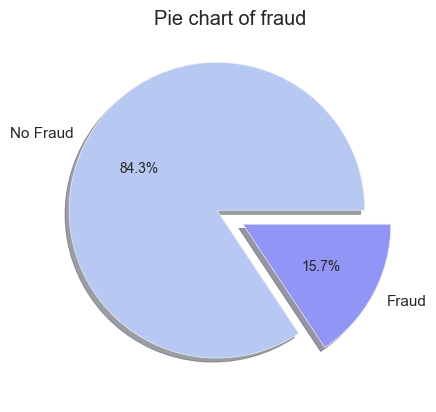

In [336]:
labels = ['No Fraud', 'Fraud']
colors = ['#B7C9F2', '#9195F6']  # Adjusted color order to match the labels

# Create the pie chart
plt.pie(df['fraud'].value_counts(), labels=labels, colors=colors, explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True)
plt.title("Pie chart of fraud")
plt.show()

In [337]:
df['fraud']

0        0
1        0
2        1
3        1
4        0
        ..
17993    0
17994    1
17995    0
17996    0
17997    0
Name: fraud, Length: 17836, dtype: category
Categories (2, int64): [0, 1]

In [338]:
y_train

3321     0
8349     0
13798    0
1504     0
14681    0
        ..
16615    0
7491     0
7262     0
4125     0
9551     1
Name: fraud, Length: 14268, dtype: category
Categories (2, int64): [0, 1]

In [339]:
print(train.columns)

Index(['age_of_driver', 'gender', 'marital_status', 'safty_rating',
       'annual_income', 'high_education_ind', 'address_change_ind',
       'living_status', 'zip_code', 'claim_day_of_week', 'accident_site',
       'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'Month', 'Day', 'Year', 'fraud'],
      dtype='object')


## Continuous Variables vs. Binary Categorical Variable (fraud)

## Box Plots

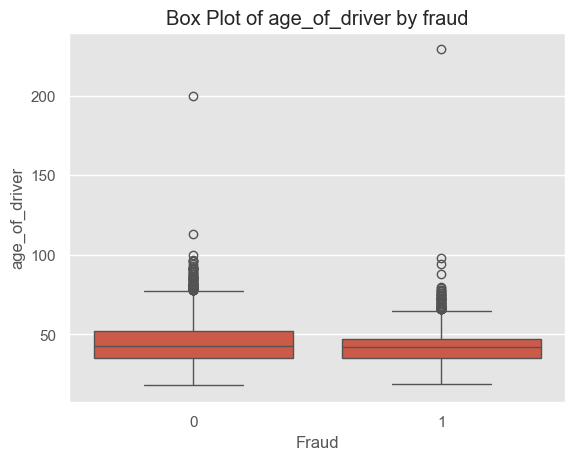

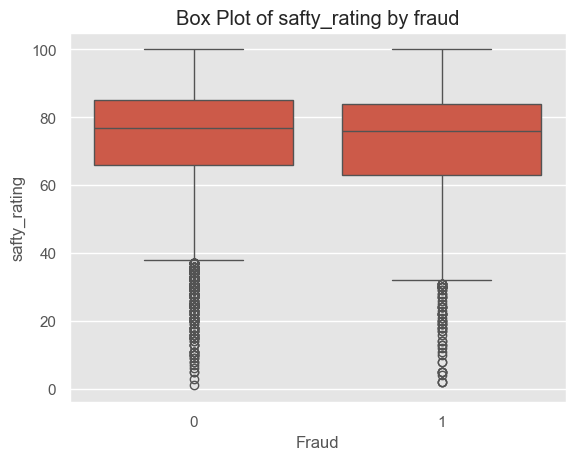

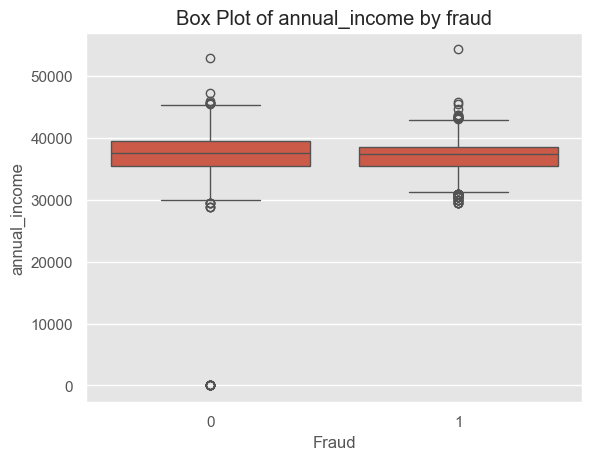

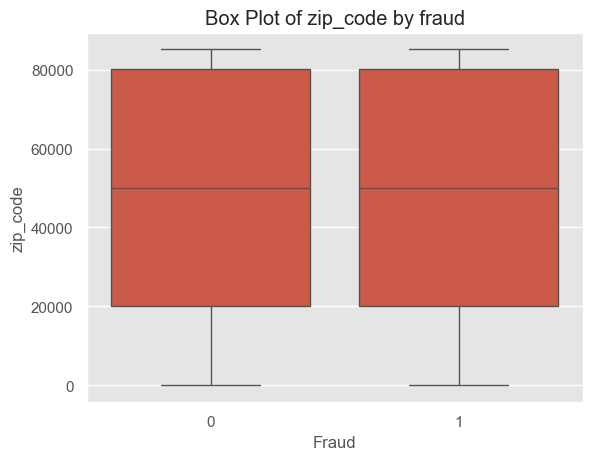

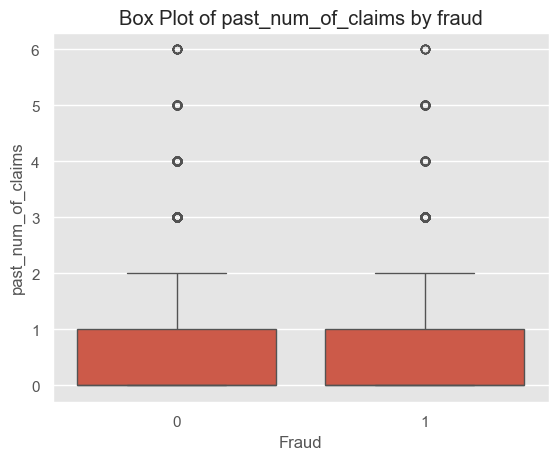

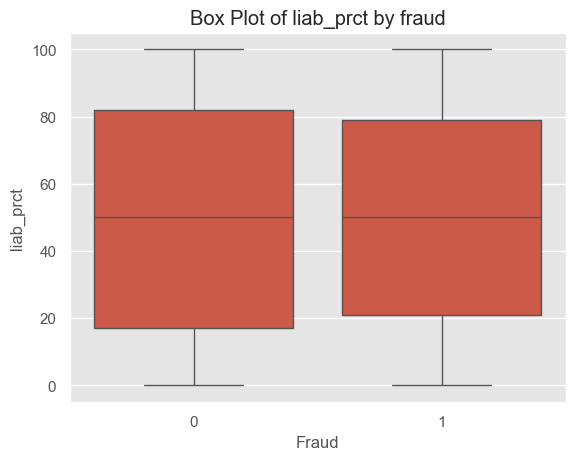

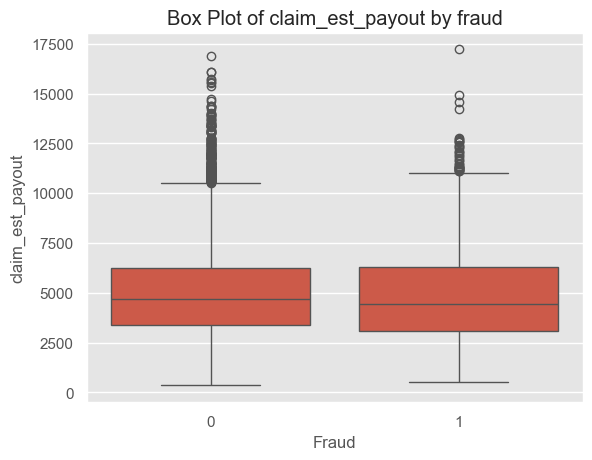

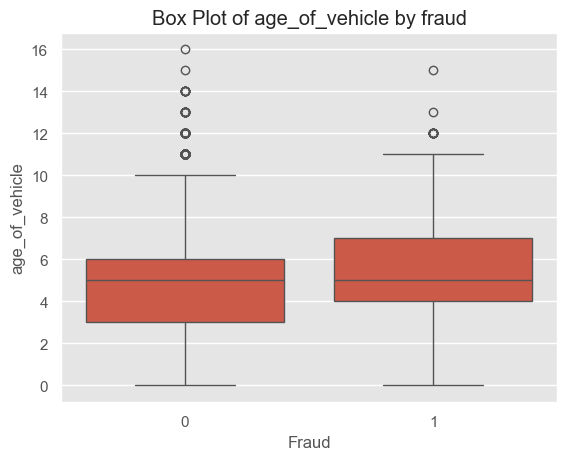

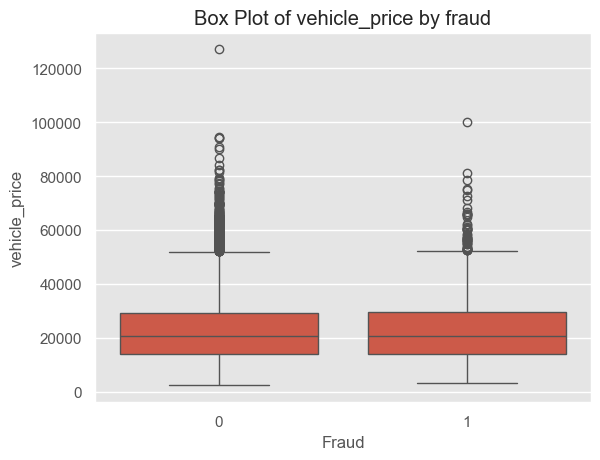

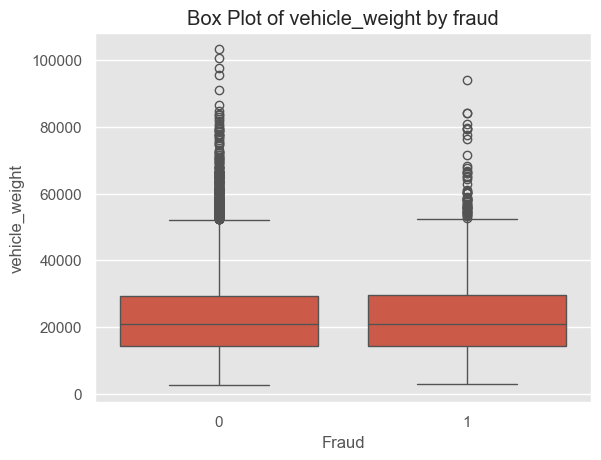

In [340]:


# Ensure 'fraud' is categorical
train['fraud'] = train['fraud'].astype('category')

# Plot box plots for continuous variables
for var in Continuous_Variables_in_X_train:
    if var in train.columns:
        sns.boxplot(data=train, x='fraud', y=var)
        plt.title(f'Box Plot of {var} by fraud')
        plt.xlabel('Fraud')
        plt.ylabel(var)
        plt.show()
    else:
        print(f"Variable {var} not found in 'train' DataFrame.")


## Violin Plots

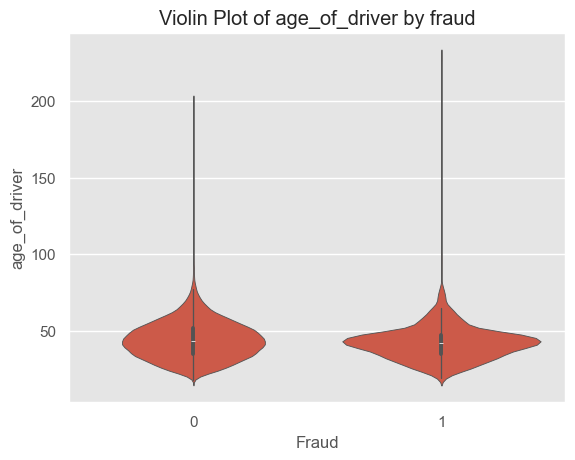

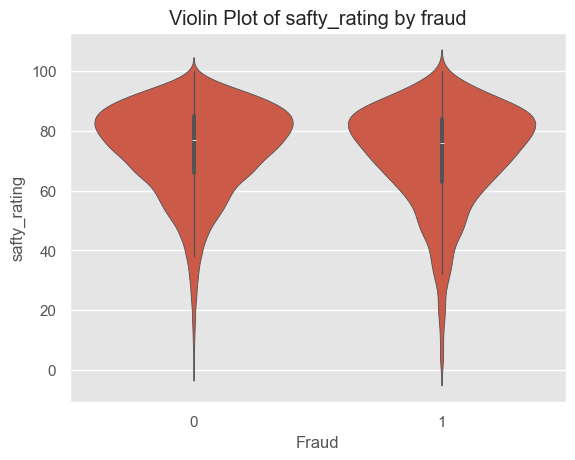

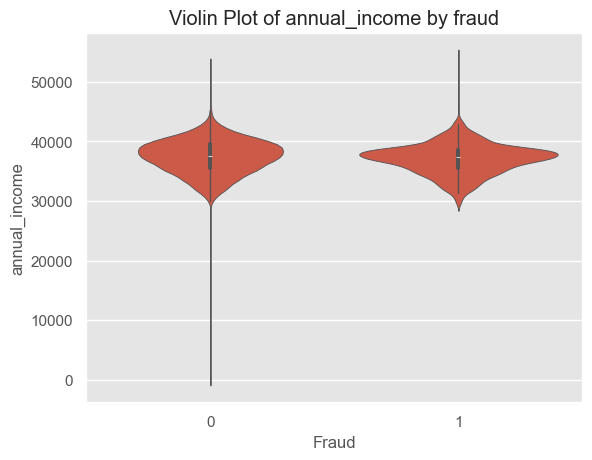

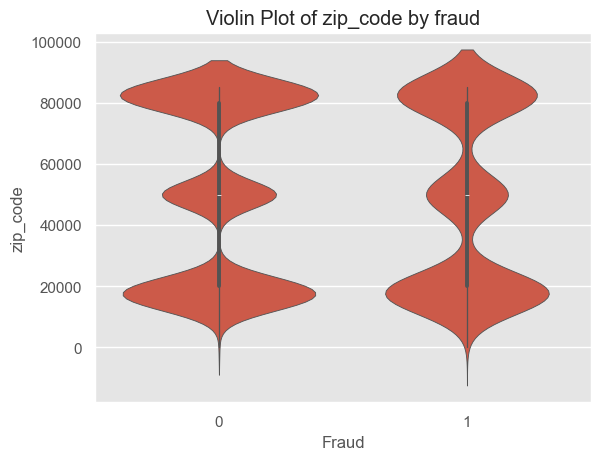

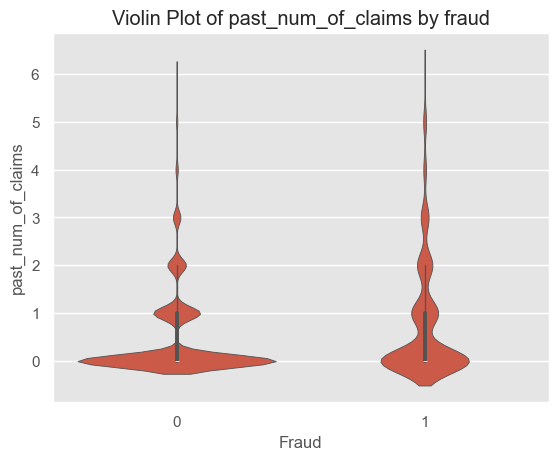

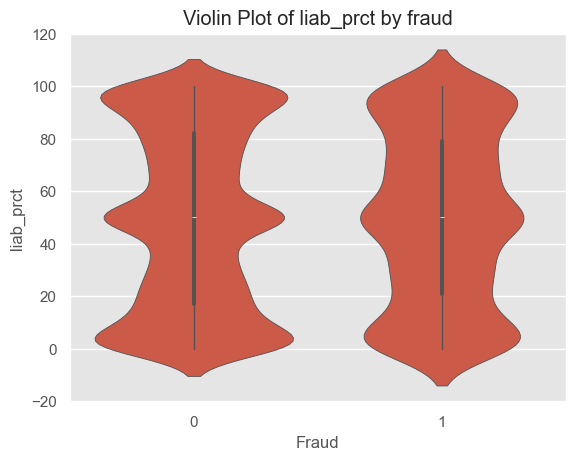

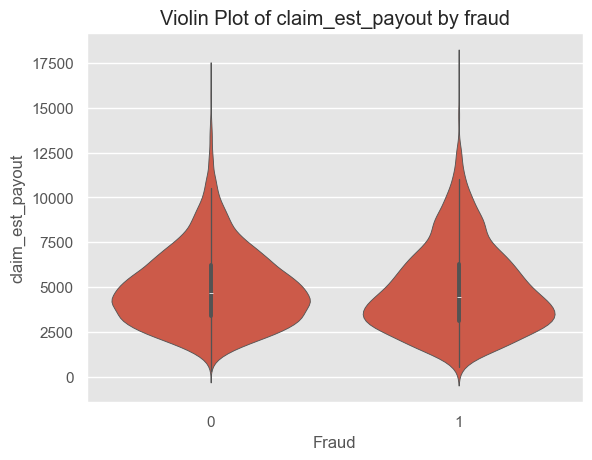

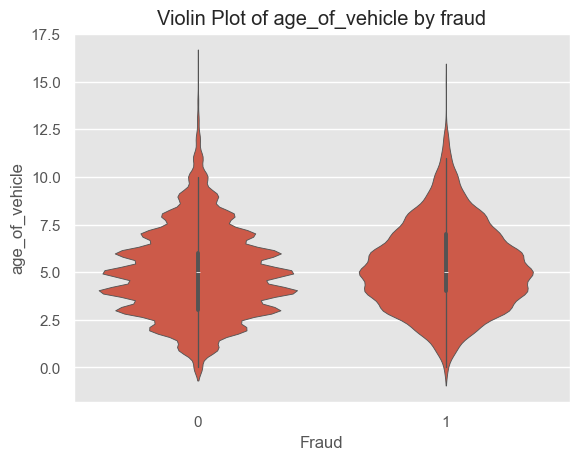

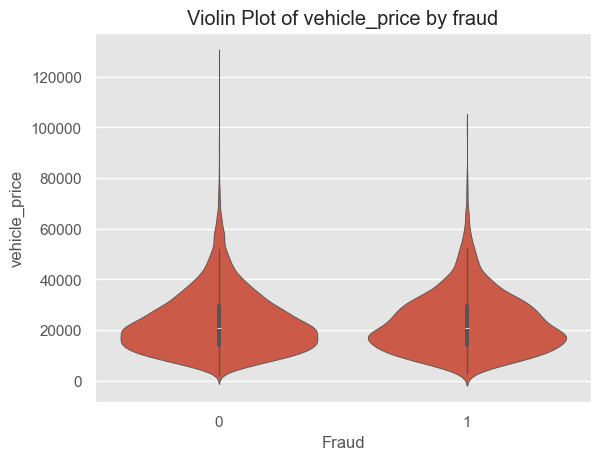

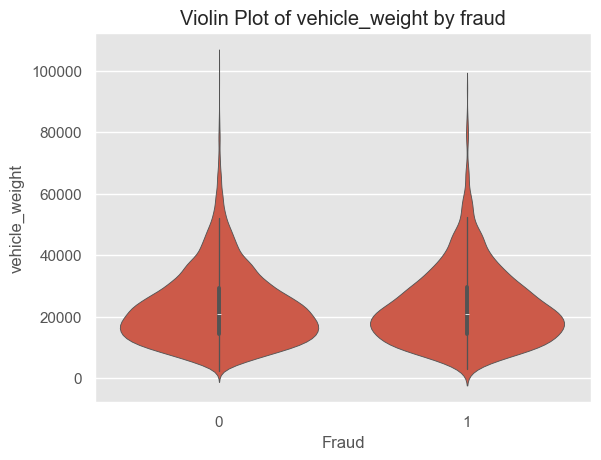

In [341]:
for var in Continuous_Variables_in_X_train:
    if var in train.columns:
        sns.violinplot(data=train, x='fraud', y=var)
        plt.title(f'Violin Plot of {var} by fraud')
        plt.xlabel('Fraud')
        plt.ylabel(var)
        plt.show()
    else:
        print(f"Variable {var} not found in 'train' DataFrame.")


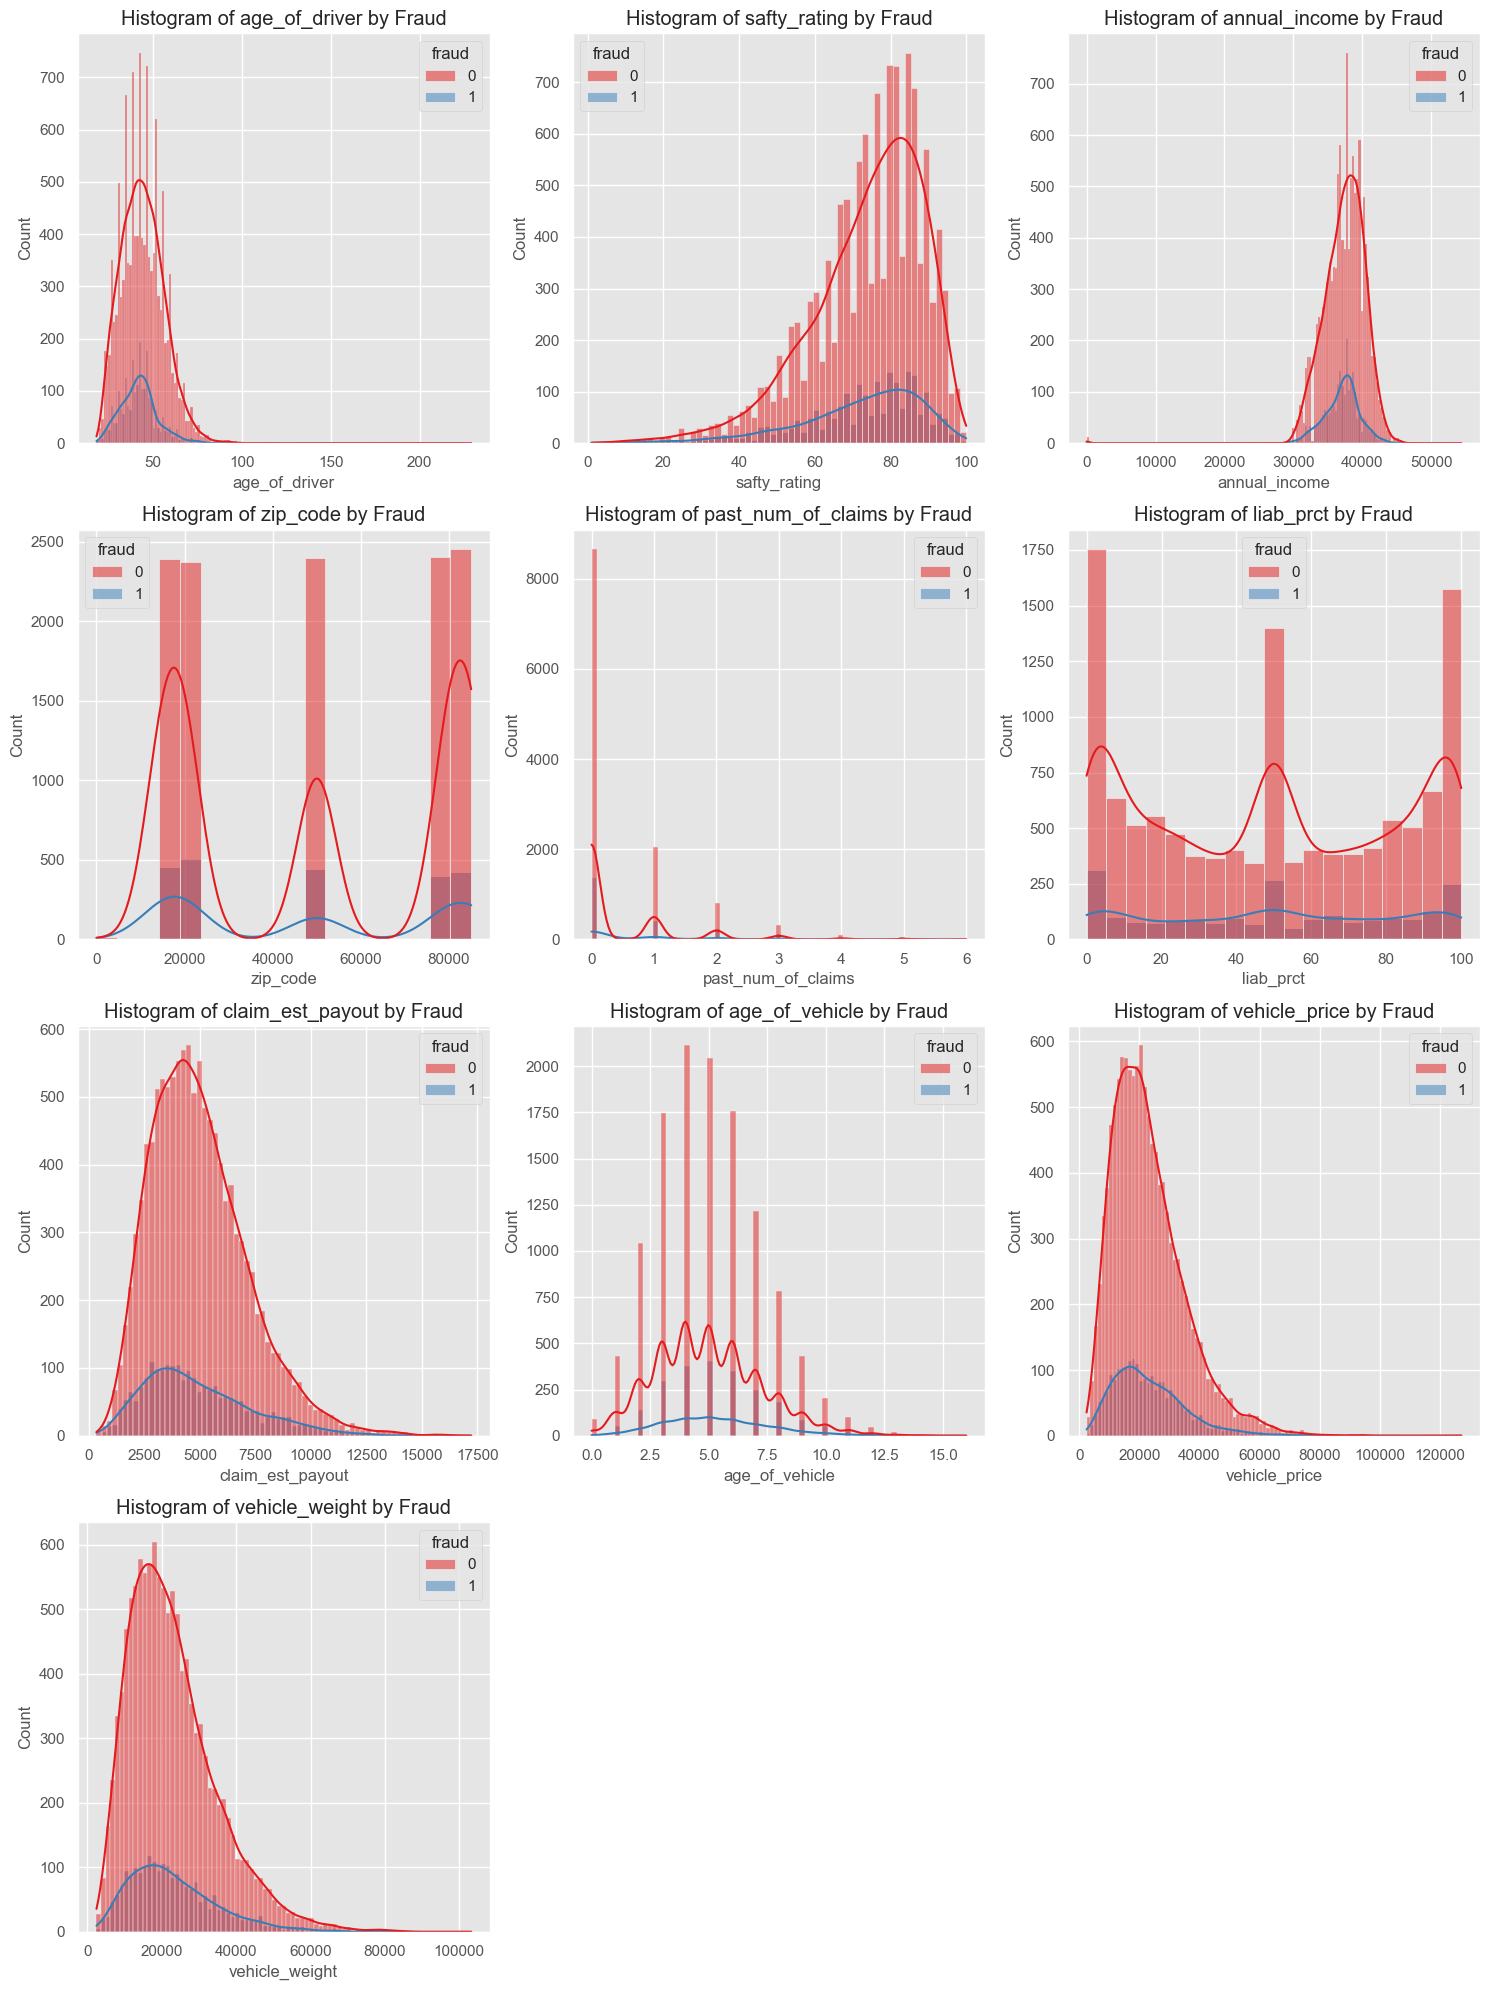

In [342]:


# Assuming 'train' is your DataFrame
# Get the names of all continuous variables (excluding 'fraud')
continuous_vars = [var for var in Continuous_Variables_in_X_train if var in train.columns]

# Create a figure with subplots
num_cols = len(continuous_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each continuous variable with hue='fraud'
for i, var in enumerate(continuous_vars):
    sns.histplot(data=train, x=var, hue='fraud', kde=True, ax=axs[i], palette='Set1')
    axs[i].set_title(f'Histogram of {var} by Fraud')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Count')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


## Categorical Variables vs. Binary Categorical Variable (fraud)

In [343]:
# pip install --upgrade seaborn matplotlib


In [344]:
print(train[Categorical_Variables_in_X_train].dtypes)
print(train['fraud'].dtype)


gender                     category
marital_status             category
high_education_ind         category
address_change_ind         category
living_status              category
claim_day_of_week            object
accident_site                object
witness_present_ind        category
channel                      object
policy_report_filed_ind    category
vehicle_category             object
vehicle_color                object
dtype: object
category


In [345]:
# Check unique values in each categorical column
for cat_var in Categorical_Variables_in_X_train:
    print(f'{cat_var} unique values:', train[cat_var].unique())

gender unique values: ['F', 'M']
Categories (2, object): ['F', 'M']
marital_status unique values: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
high_education_ind unique values: [1, 0]
Categories (2, int64): [0, 1]
address_change_ind unique values: [1, 0]
Categories (2, int64): [0, 1]
living_status unique values: ['Own', 'Rent']
Categories (2, object): ['Own', 'Rent']
claim_day_of_week unique values: ['Friday' 'Saturday' 'Thursday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
accident_site unique values: ['Parking Lot' 'Local' 'Highway']
witness_present_ind unique values: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
channel unique values: ['Broker' 'Online' 'Phone']
policy_report_filed_ind unique values: [0, 1]
Categories (2, int64): [0, 1]
vehicle_category unique values: ['Compact' 'Medium' 'Large']
vehicle_color unique values: ['gray' 'black' 'other' 'red' 'white' 'blue' 'silver']


In [346]:
print(train.columns)

Index(['age_of_driver', 'gender', 'marital_status', 'safty_rating',
       'annual_income', 'high_education_ind', 'address_change_ind',
       'living_status', 'zip_code', 'claim_day_of_week', 'accident_site',
       'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'Month', 'Day', 'Year', 'fraud'],
      dtype='object')


In [347]:
import pandas as pd

# Assuming x_train is your DataFrame and it contains the columns 'Male' and 'Fraud'
contingency_table = pd.crosstab(X_train['gender'],train['fraud'], rownames=['gender'], colnames=['fraud'])

print(contingency_table)


fraud      0     1
gender            
F       5634  1189
M       6402  1043


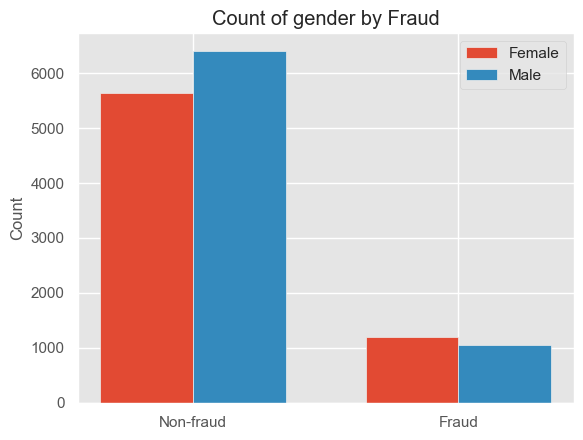

In [348]:
# Create the contingency table with fraud on x-axis and Male on y-axis
contingency_table = pd.crosstab(train['fraud'], train['gender'])

# Define labels
fraud_labels = ['Non-fraud', 'Fraud']
gender_labels = ['Female', 'Male']

# Data for plotting
counts = contingency_table.values

# Plotting
fig, ax = plt.subplots()
width = 0.35
x = list(range(len(fraud_labels)))  # Convert range object to a list

# Plot bars
rects1 = ax.bar([val - width/2 for val in x], counts[:,0], width, label=gender_labels[0])
rects2 = ax.bar([val + width/2 for val in x], counts[:,1], width, label=gender_labels[1])

# Add labels, title, and legend
ax.set_ylabel('Count')
ax.set_title('Count of gender by Fraud')
ax.set_xticks(x)
ax.set_xticklabels(fraud_labels)
ax.legend()

# Display the plot
plt.show()

The analysis reveals a notable trend in the relationship between gender and fraud. The data indicates that women are more likely to commit fraud compared to men. In contrast, males demonstrate a lower propensity for fraudulent activities. This insight highlights a significant gender-based difference in fraud likelihood, which could be valuable for targeted risk management strategies.

In [349]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming x_train is your DataFrame and it contains the columns 'marital_status' and 'fraud'
# Create the contingency table with fraud on x-axis and marital_status on y-axis
contingency_table = pd.crosstab(train['fraud'], train['marital_status'])

# Define labels
fraud_labels = ['Non-fraud', 'Fraud']
marital_status_labels = ['Non-married', 'Married']

# Data for plotting
counts = contingency_table.values

contingency_table

marital_status,0.0,1.0
fraud,,
0,3277,8759
1,831,1401


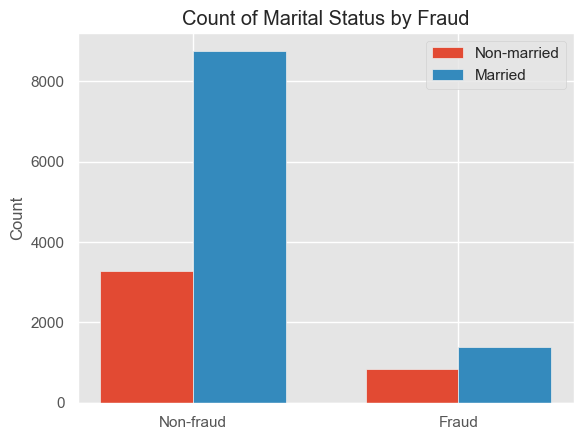

In [350]:


# Plotting
fig, ax = plt.subplots()
width = 0.35
x = list(range(len(fraud_labels)))  # Convert range object to a list

# Plot bars
rects1 = ax.bar([val - width/2 for val in x], counts[:,0], width, label=marital_status_labels[0])
rects2 = ax.bar([val + width/2 for val in x], counts[:,1], width, label=marital_status_labels[1])

# Add labels, title, and legendM
ax.set_ylabel('Count')
ax.set_title('Count of Marital Status by Fraud')
ax.set_xticks(x)
ax.set_xticklabels(fraud_labels)
ax.legend()

# Display the plot
plt.show()


In [351]:

# Assuming x_train is your DataFrame and it contains the columns 'Male' and 'Fraud'
contingency_table = pd.crosstab(X_train['high_education_ind'],train['fraud'], rownames=['high_education_ind'], colnames=['fraud'])

print(contingency_table)

fraud                  0     1
high_education_ind            
0                   3369   889
1                   8667  1343


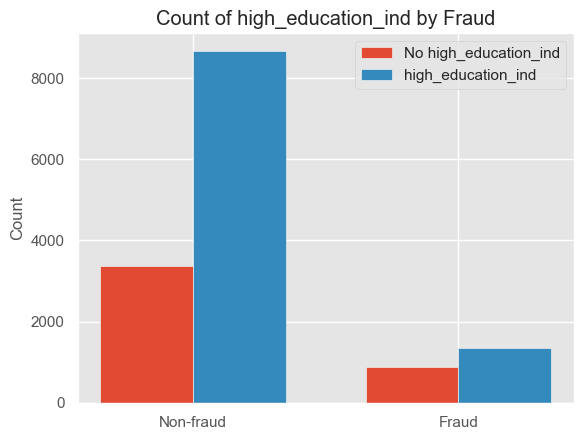

In [352]:

# Create the contingency table with fraud on x-axis and Male on y-axis
contingency_table = pd.crosstab(train['fraud'], train['high_education_ind'])

# Define labels
fraud_labels = ['Non-fraud', 'Fraud']
gender_labels = ['No high_education_ind', 'high_education_ind']

# Data for plotting
counts = contingency_table.values

# Plotting
fig, ax = plt.subplots()
width = 0.35
x = list(range(len(fraud_labels)))  # Convert range object to a list

# Plot bars
rects1 = ax.bar([val - width/2 for val in x], counts[:,0], width, label=gender_labels[0])
rects2 = ax.bar([val + width/2 for val in x], counts[:,1], width, label=gender_labels[1])

# Add labels, title, and legend
ax.set_ylabel('Count')
ax.set_title('Count of high_education_ind by Fraud')
ax.set_xticks(x)
ax.set_xticklabels(fraud_labels)
ax.legend()

# Display the plot
plt.show()

fraud                  0     1
address_change_ind            
0                   5315   739
1                   6721  1493


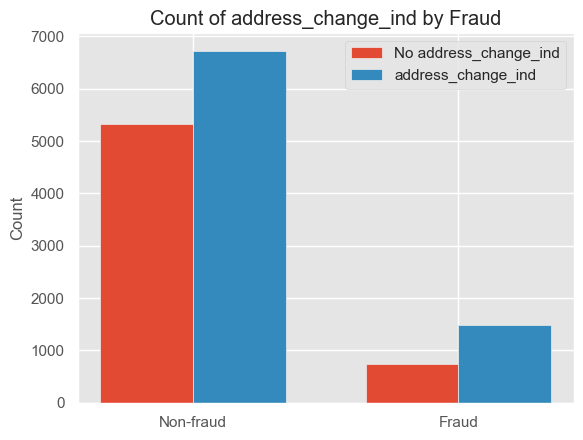

In [353]:
# Assuming x_train is your DataFrame and it contains the columns 'Male' and 'Fraud'
contingency_table = pd.crosstab(X_train['address_change_ind'],train['fraud'], rownames=['address_change_ind'], colnames=['fraud'])

print(contingency_table)

# Create the contingency table with fraud on x-axis and Male on y-axis
contingency_table = pd.crosstab(train['fraud'], train['address_change_ind'])

# Define labels
fraud_labels = ['Non-fraud', 'Fraud']
gender_labels = ['No address_change_ind', 'address_change_ind']

# Data for plotting
counts = contingency_table.values

# Plotting
fig, ax = plt.subplots()
width = 0.35
x = list(range(len(fraud_labels)))  # Convert range object to a list

# Plot bars
rects1 = ax.bar([val - width/2 for val in x], counts[:,0], width, label=gender_labels[0])
rects2 = ax.bar([val + width/2 for val in x], counts[:,1], width, label=gender_labels[1])

# Add labels, title, and legend
ax.set_ylabel('Count')
ax.set_title('Count of address_change_ind by Fraud')
ax.set_xticks(x)
ax.set_xticklabels(fraud_labels)
ax.legend()

# Display the plot
plt.show()


In [354]:


# Create the contingency table with accident_site and fraud
contingency_table = pd.crosstab(train['accident_site'], train['fraud'])
contingency_table

fraud,0,1
accident_site,,
Highway,2362,597
Local,5767,1207
Parking Lot,3907,428


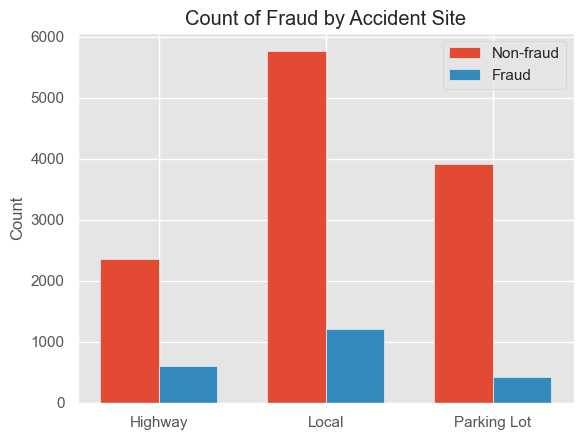

In [355]:


# Define labels
accident_site_labels = ['Highway', 'Local', 'Parking Lot']
fraud_labels = ['Non-fraud', 'Fraud']

# Data for plotting
counts = contingency_table.values

# Plotting
fig, ax = plt.subplots()
width = 0.35
x = list(range(len(accident_site_labels)))  # Convert range object to a list

# Plot bars
rects1 = ax.bar([val - width/2 for val in x], counts[:,0], width, label=fraud_labels[0])
rects2 = ax.bar([val + width/2 for val in x], counts[:,1], width, label=fraud_labels[1])

# Add labels, title, and legend
ax.set_ylabel('Count')
ax.set_title('Count of Fraud by Accident Site')
ax.set_xticks(x)
ax.set_xticklabels(accident_site_labels)
ax.legend()

# Display the plot
plt.show()


In [356]:

# Create the contingency table
contingency_table = pd.crosstab(train['vehicle_category'], train['fraud'])
contingency_table


fraud,0,1
vehicle_category,,
Compact,4041,766
Large,4075,703
Medium,3920,763


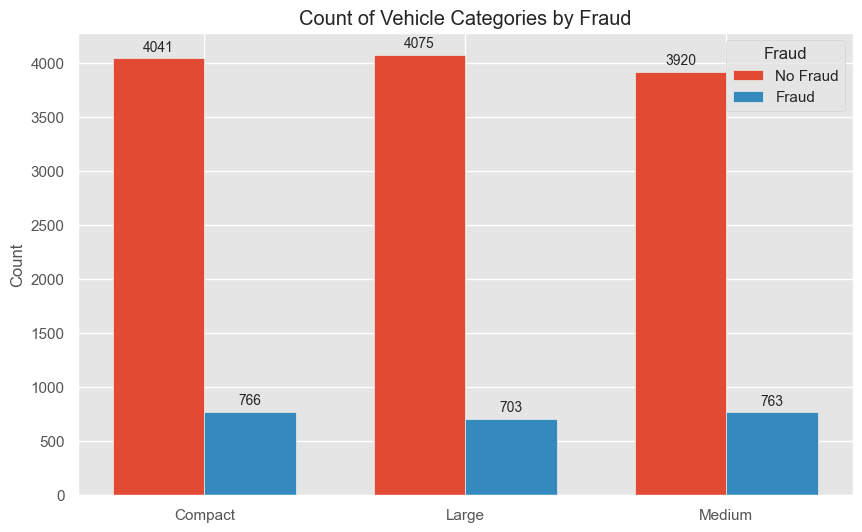

In [357]:


# Create the contingency table
contingency_table = pd.crosstab(train['vehicle_category'], train['fraud'])

# Define labels
vehicle_categories = contingency_table.index
fraud_labels = ['No Fraud', 'Fraud']

# Data for plotting
counts = contingency_table.values

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = list(range(len(vehicle_categories)))  # Convert range object to a list

# Plot bars
rects1 = ax.bar([val - width/2 for val in x], counts[:,0], width, label=fraud_labels[0])
rects2 = ax.bar([val + width/2 for val in x], counts[:,1], width, label=fraud_labels[1])

# Add labels, title, and legend
ax.set_ylabel('Count')
ax.set_title('Count of Vehicle Categories by Fraud')
ax.set_xticks(x)
ax.set_xticklabels(vehicle_categories)
ax.legend(title='Fraud')

# Annotate bars with counts
def add_labels(rects):
    """Attach a text label above each bar in `rects`, displaying the height of the bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
add_labels(rects1)
add_labels(rects2)

# Display the plot
plt.show()


## Count Plot

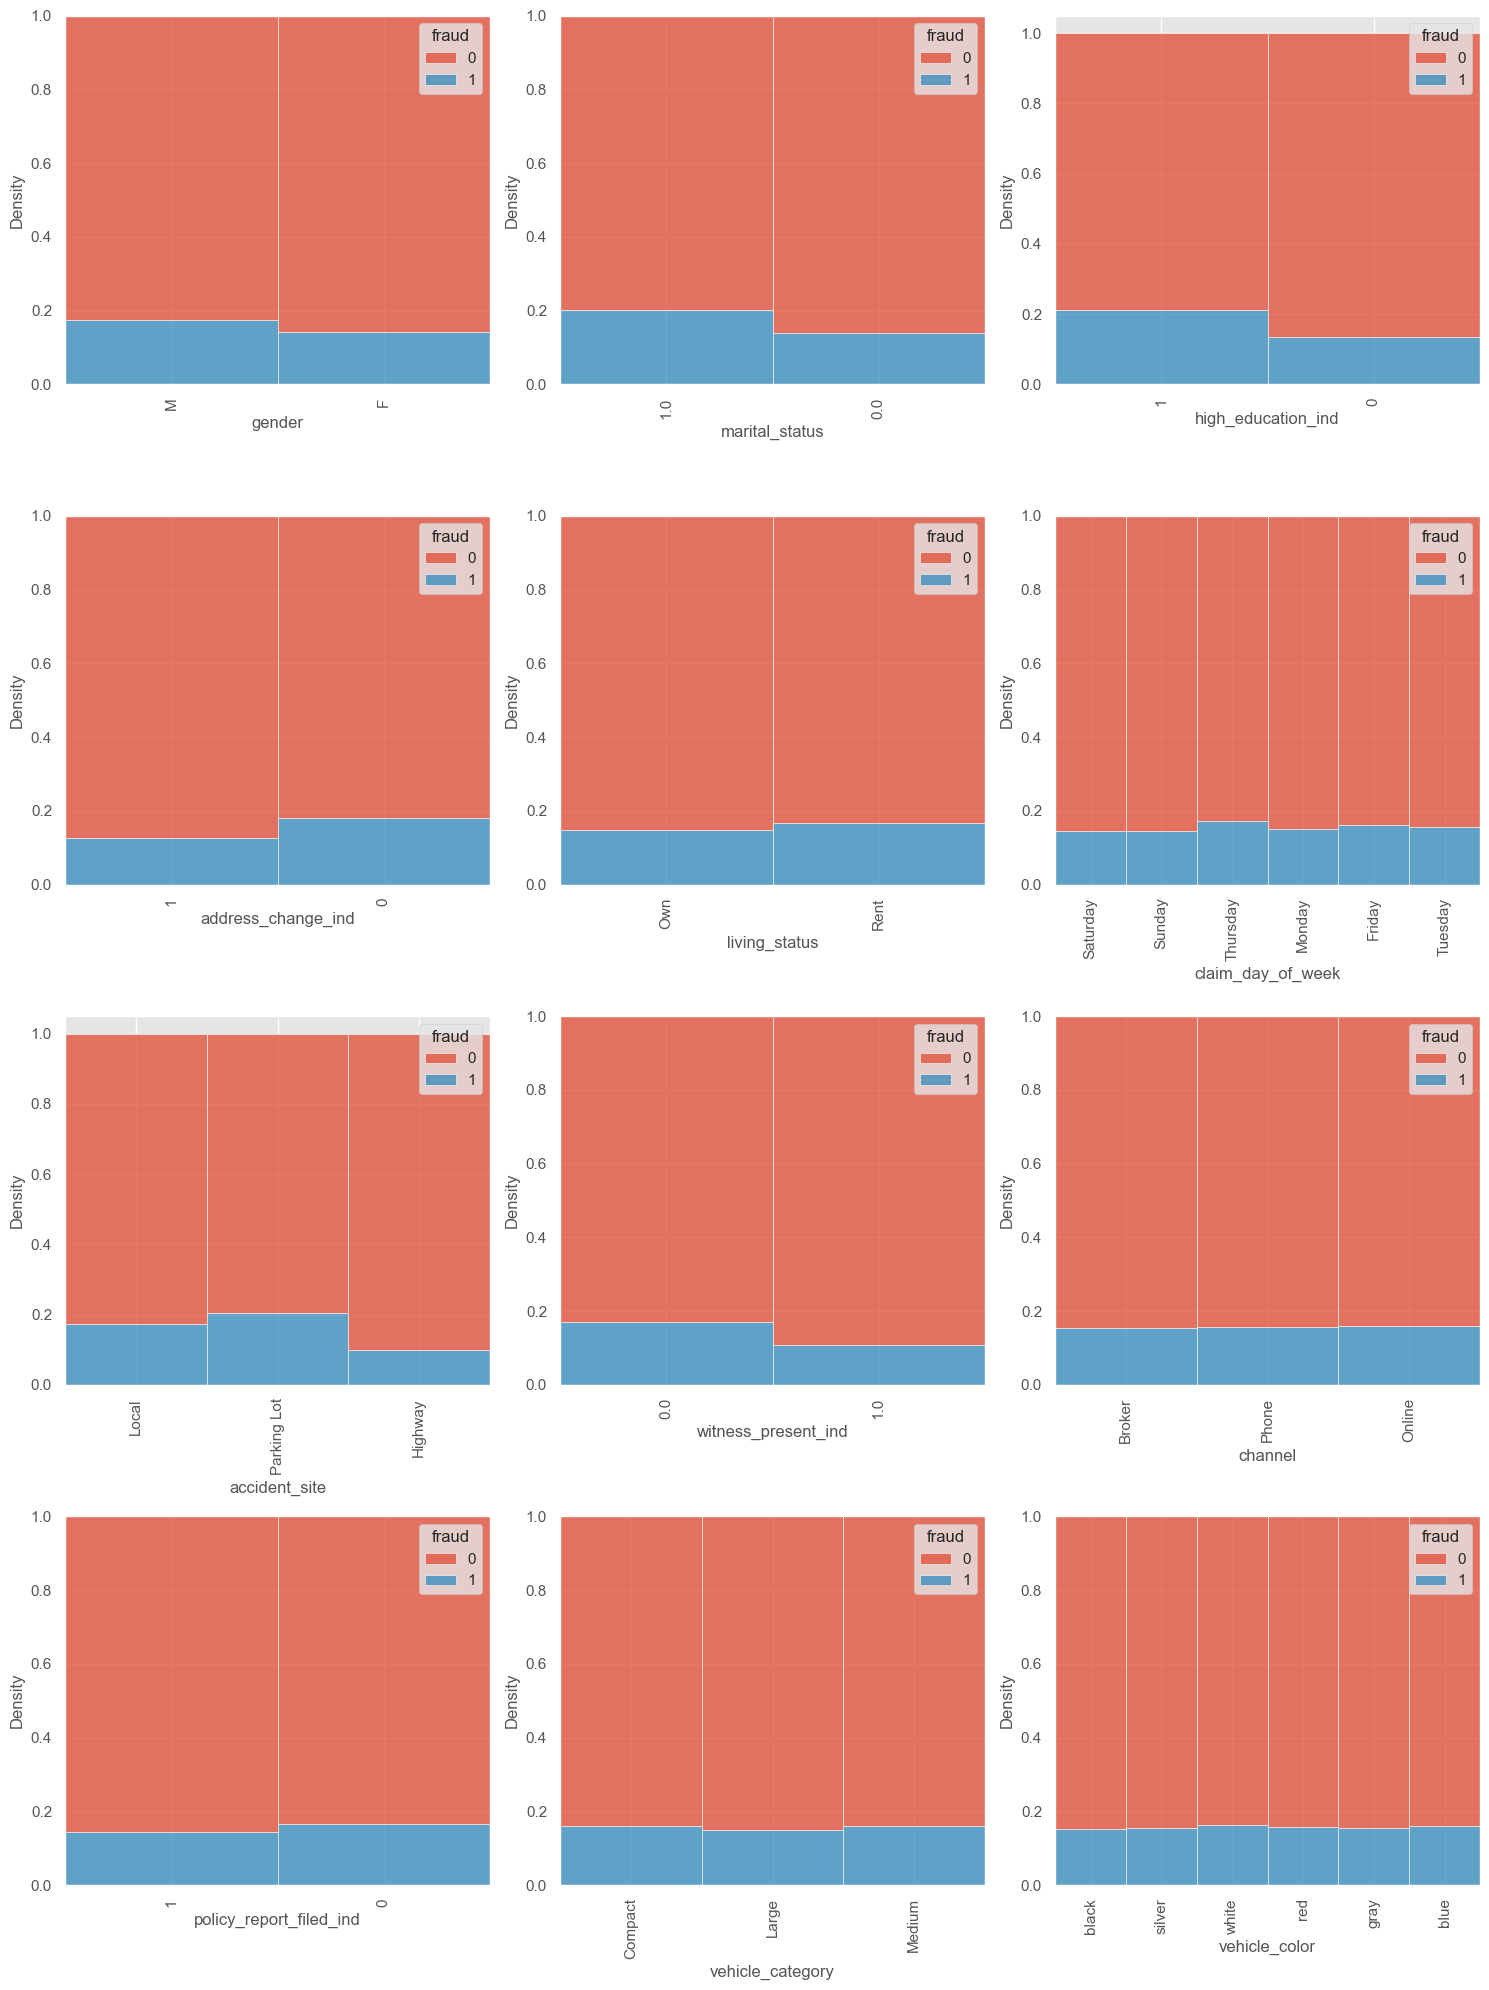

In [358]:
import warnings

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = train.select_dtypes(include=['object','category']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'fraud' in cat_vars:
    cat_vars.remove('fraud')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable as a density plot
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    
    # Set x-tick positions explicitly
    tick_positions = range(len(top_values))
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(top_values, rotation=90)  # Set x-tick labels
    
    sns.histplot(x=var, hue='fraud', data=filtered_df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

## Chi Square test among catergorical variables and response variable

In [359]:
## Befoe applying chi-square test check for the assumptions

In [360]:

import pandas as pd
from scipy import stats
def check_chi_square_assumptions(var, response_variable, df):
    # Generate contingency table
    contingency_table = pd.crosstab(df[var], df[response_variable])
    
    # Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"Variable: {var}")
    
    # 1. Independence of Observations
    print("Independence of Observations: Generally checked by study design, ensure no related observations.")
    
    # 2. Adequate Sample Size
    min_expected_frequency = expected.min()
    if min_expected_frequency < 5:
        print(f"Warning: Variable {var} has cells with expected frequency less than 5. Minimum expected frequency: {min_expected_frequency}.")
    else:
        print(f"Variable {var} meets the assumption for expected frequencies.")
    
    # 3. Categorical Data
    if df[var].dtype not in ['object', 'category'] or df[response_variable].dtype not in ['object', 'category']:
        print(f"Warning: One or both variables {var} and {response_variable} are not categorical.")
    
    # 4. Mutually Exclusive Categories
    unique_var_values = df[var].unique()
    unique_response_values = df[response_variable].unique()
    print("Mutually Exclusive Categories Check:")
    print(f"Unique values for {var}: {unique_var_values}")
    print(f"Unique values for {response_variable}: {unique_response_values}")
    
    # 5. No Small Expected Frequencies
    if (expected < 5).sum() > 0:
        print(f"Warning: Variable {var} has cells with expected frequency less than 5.")
    else:
        print(f"Variable {var} meets the assumption for no small expected frequencies.")

# List of categorical variables
Categorical_Variables_in_X_train 

response_variable = 'fraud'

# Check assumptions for categorical variables
print("Checking assumptions for Chi-Square Test:")
for var in Categorical_Variables_in_X_train:
    check_chi_square_assumptions(var, response_variable, train)
    print("\n" + "-"*50 + "\n")


Checking assumptions for Chi-Square Test:
Variable: gender
Independence of Observations: Generally checked by study design, ensure no related observations.
Variable gender meets the assumption for expected frequencies.
Mutually Exclusive Categories Check:
Unique values for gender: ['F', 'M']
Categories (2, object): ['F', 'M']
Unique values for fraud: [0, 1]
Categories (2, int64): [0, 1]
Variable gender meets the assumption for no small expected frequencies.

--------------------------------------------------

Variable: marital_status
Independence of Observations: Generally checked by study design, ensure no related observations.
Variable marital_status meets the assumption for expected frequencies.
Mutually Exclusive Categories Check:
Unique values for marital_status: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values for fraud: [0, 1]
Categories (2, int64): [0, 1]
Variable marital_status meets the assumption for no small expected frequencies.

-------------------------------

In [361]:
import pandas as pd
from scipy import stats

def check_chi_square_assumptions(var, response_variable, df):
    # Generate contingency table
    contingency_table = pd.crosstab(df[var], df[response_variable])
    
    # Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"Variable: {var}")
    
    assumptions_met = True
    
    # 1. Independence of Observations
    print("Independence of Observations: Generally checked by study design, ensure no related observations.")
    
    # 2. Adequate Sample Size
    min_expected_frequency = expected.min()
    if min_expected_frequency < 5:
        print(f"Warning: Variable {var} has cells with expected frequency less than 5. Minimum expected frequency: {min_expected_frequency}.")
        assumptions_met = False
    else:
        print(f"Variable {var} meets the assumption for expected frequencies.")
    
    # 3. Categorical Data
    if df[var].dtype not in ['object', 'category'] or df[response_variable].dtype not in ['object', 'category']:
        print(f"Warning: One or both variables {var} and {response_variable} are not categorical.")
        assumptions_met = False
    
    # 4. Mutually Exclusive Categories
    unique_var_values = df[var].unique()
    unique_response_values = df[response_variable].unique()
    print("Mutually Exclusive Categories Check:")
    print(f"Unique values for {var}: {unique_var_values}")
    print(f"Unique values for {response_variable}: {unique_response_values}")
    
    # 5. No Small Expected Frequencies
    if (expected < 5).sum() > 0:
        print(f"Warning: Variable {var} has cells with expected frequency less than 5.")
        assumptions_met = False
    else:
        print(f"Variable {var} meets the assumption for no small expected frequencies.")
    
    return assumptions_met


# Check assumptions for categorical variables
print("Checking assumptions for Chi-Square Test:")
for var in Categorical_Variables_in_X_train:
    assumptions_met = check_chi_square_assumptions(var, response_variable, train)
    if assumptions_met:
        print(f"Variable {var} meets all the assumptions for the Chi-Square Test.\n")
    else:
        print(f"Variable {var} does not meet all the assumptions for the Chi-Square Test.\n")
    print("-" * 50)


Checking assumptions for Chi-Square Test:
Variable: gender
Independence of Observations: Generally checked by study design, ensure no related observations.
Variable gender meets the assumption for expected frequencies.
Mutually Exclusive Categories Check:
Unique values for gender: ['F', 'M']
Categories (2, object): ['F', 'M']
Unique values for fraud: [0, 1]
Categories (2, int64): [0, 1]
Variable gender meets the assumption for no small expected frequencies.
Variable gender meets all the assumptions for the Chi-Square Test.

--------------------------------------------------
Variable: marital_status
Independence of Observations: Generally checked by study design, ensure no related observations.
Variable marital_status meets the assumption for expected frequencies.
Mutually Exclusive Categories Check:
Unique values for marital_status: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values for fraud: [0, 1]
Categories (2, int64): [0, 1]
Variable marital_status meets the assumption f

In [362]:
import pandas as pd
from scipy import stats

def check_chi_square_assumptions(var, response_variable, df):
    # Generate contingency table
    contingency_table = pd.crosstab(df[var], df[response_variable])
    
    # Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    assumptions_met = True
    
    # 1. Independence of Observations
    # (Assumed to be checked by study design, no direct check here)
    
    # 2. Adequate Sample Size
    min_expected_frequency = expected.min()
    if min_expected_frequency < 5:
        assumptions_met = False
    
    # 3. Categorical Data
    if df[var].dtype not in ['object', 'category'] or df[response_variable].dtype not in ['object', 'category']:
        assumptions_met = False
    
    # 4. Mutually Exclusive Categories
    # (No direct check needed for mutual exclusivity in the code)
    
    # 5. No Small Expected Frequencies
    if (expected < 5).sum() > 0:
        assumptions_met = False
    
    return assumptions_met



# List to store results
results = []

# Check assumptions for categorical variables
for var in Categorical_Variables_in_X_train:
    assumptions_met = check_chi_square_assumptions(var, response_variable, train)
    if assumptions_met:
        results.append(f"Variable {var} meets all the assumptions for the Chi-Square Test.")
    else:
        results.append(f"Variable {var} does not meet all the assumptions for the Chi-Square Test.")

# Print all results at the end
print("Checking assumptions for Chi-Square Test:")
print("\n".join(results))


Checking assumptions for Chi-Square Test:
Variable gender meets all the assumptions for the Chi-Square Test.
Variable marital_status meets all the assumptions for the Chi-Square Test.
Variable high_education_ind meets all the assumptions for the Chi-Square Test.
Variable address_change_ind meets all the assumptions for the Chi-Square Test.
Variable living_status meets all the assumptions for the Chi-Square Test.
Variable claim_day_of_week meets all the assumptions for the Chi-Square Test.
Variable accident_site meets all the assumptions for the Chi-Square Test.
Variable witness_present_ind meets all the assumptions for the Chi-Square Test.
Variable channel meets all the assumptions for the Chi-Square Test.
Variable policy_report_filed_ind meets all the assumptions for the Chi-Square Test.
Variable vehicle_category meets all the assumptions for the Chi-Square Test.
Variable vehicle_color meets all the assumptions for the Chi-Square Test.


In [363]:

# Assuming df is your dataframe and 'fraud' is your response variable
response_variable = 'fraud'

# Create a DataFrame to store the results
results = {
    'Variable': [],
    'Chi2': [],
    'p-value': []
}

# Function to check chi-square assumptions and perform the test
def check_chi_square_assumptions(var, response_variable, df):
    contingency_table = pd.crosstab(df[var], df[response_variable])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Append results to the results dictionary
    results['Variable'].append(var)
    results['Chi2'].append(chi2)
    results['p-value'].append(p)
    
    # Print details
    print(f"Variable: {var}")
    print("Contingency Table:")
    print(contingency_table)
    print("Expected Frequency Table:")
    print(expected)
    print(f"Chi2: {chi2}, p-value: {p}\n")
    
    # Check for cells with expected frequency less than 5
    if (expected < 5).sum() > 0:
        print(f"Warning: Variable {var} has cells with expected frequency less than 5.\n")
    else:
        print(f"Variable {var} meets the assumption for expected frequencies.\n")

# Check assumptions and perform Chi-Square Test for categorical variables
print("Checking assumptions for Chi-Square Test:")
for var in Categorical_Variables_in_X_train:
    check_chi_square_assumptions(var, response_variable, train)

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Filter significant variables (p-value < 0.05)
significant_vars = results_df[results_df['p-value'] < 0.05]

print("Significant Variables (p-value < 0.05):")
print(significant_vars)


Checking assumptions for Chi-Square Test:
Variable: gender
Contingency Table:
fraud      0     1
gender            
F       5634  1189
M       6402  1043
Expected Frequency Table:
[[5755.6509672 1067.3490328]
 [6280.3490328 1164.6509672]]
Chi2: 31.241122558137775, p-value: 2.278872066345691e-08

Variable gender meets the assumption for expected frequencies.

Variable: marital_status
Contingency Table:
fraud              0     1
marital_status            
0.0             3277   831
1.0             8759  1401
Expected Frequency Table:
[[3465.36921783  642.63078217]
 [8570.63078217 1589.36921783]]
Chi2: 91.43238412821273, p-value: 1.154711684491277e-21

Variable marital_status meets the assumption for expected frequencies.

Variable: high_education_ind
Contingency Table:
fraud                  0     1
high_education_ind            
0                   3369   889
1                   8667  1343
Expected Frequency Table:
[[3591.90412111  666.09587889]
 [8444.09587889 1565.90412111]]
Chi2: 12

Mean value Table
                           Fraud     Non-Fraud
Variable                                      
age_of_driver          42.035394     43.955218
safty_rating           71.907258     73.845131
annual_income       37065.696685  37413.260552
zip_code            48025.398297  50245.267365
past_num_of_claims      0.755376      0.453639
liab_prct              49.888889     49.239365
claim_est_payout     4880.948427   4978.913096
age_of_vehicle          5.277778      4.962280
vehicle_price       22980.974823  23081.010415
vehicle_weight      23251.319102  23036.152398


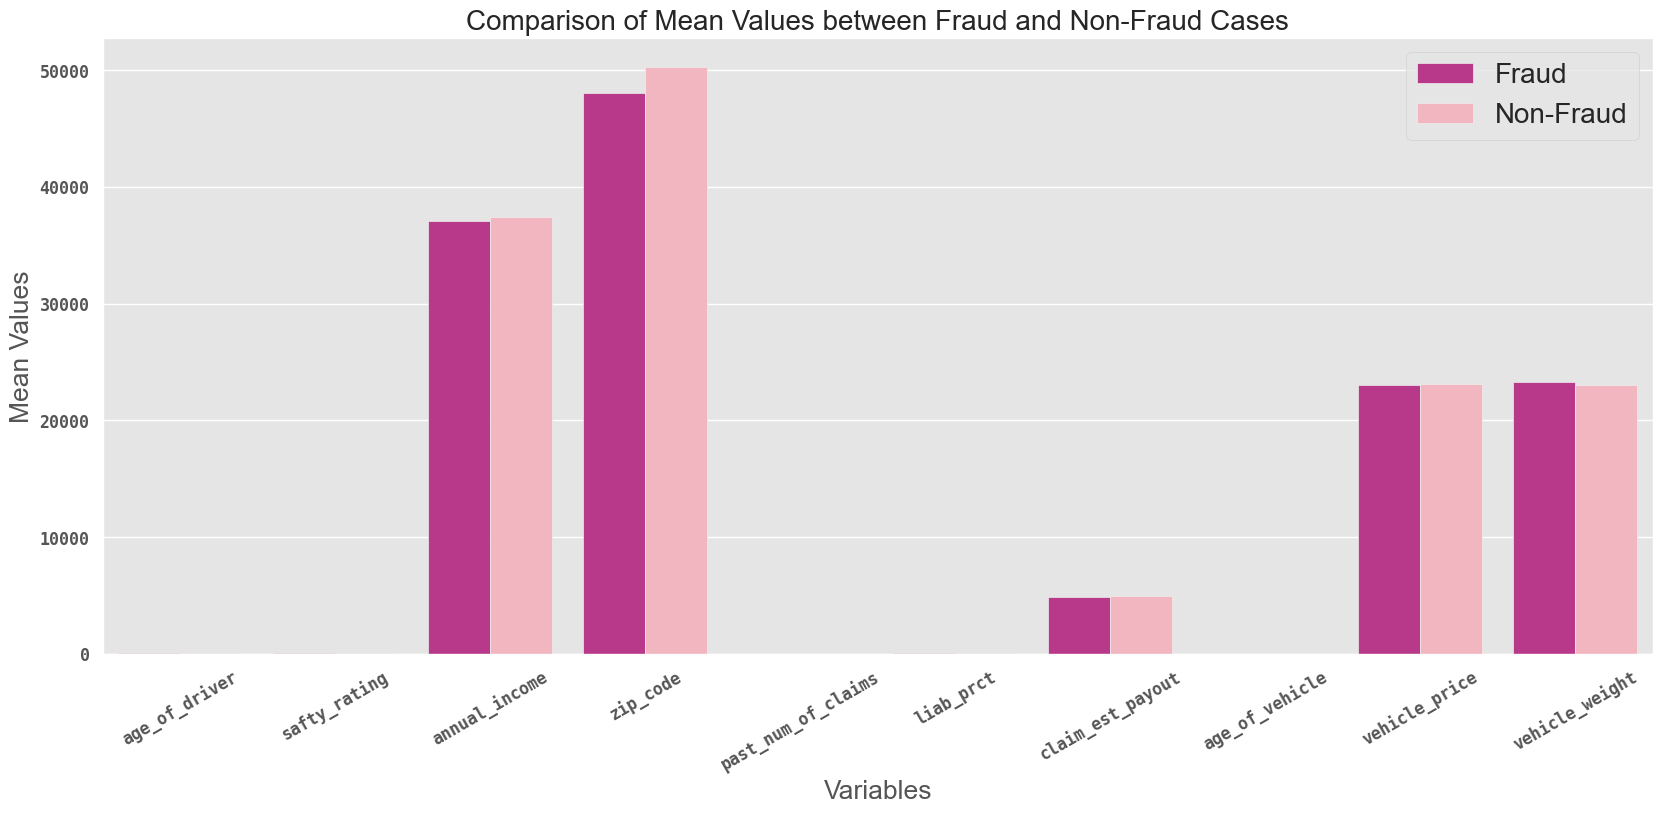

In [293]:

# Assume categorical_vars and 'Date_Month_Year' are defined
date_variable = 'Date_Month_Year'

# Filter data
with_fraud = train[train['fraud'] == 1]
without_fraud = train[train['fraud'] == 0]

# Drop specified columns
with_fraud = with_fraud.drop(columns=categorical_vars, errors='ignore')
without_fraud = without_fraud.drop(columns=categorical_vars, errors='ignore')

# Drop 'Month', 'Day', 'Year' if they exist
with_fraud = with_fraud.drop(["Month", "Day", "Year"], axis=1, errors='ignore')
without_fraud = without_fraud.drop(["Month", "Day", "Year"], axis=1, errors='ignore')

# Calculate mean values for each feature
mean_with_fraud = with_fraud.mean(axis=0, skipna=True)
mean_without_fraud = without_fraud.mean(axis=0, skipna=True)

# Prepare data for the mean value table
mean_data = {
    'Variable': [],
    'Fraud': [],
    'Non-Fraud': []
}

for feature in mean_with_fraud.index:
    mean_data['Variable'].append(feature)
    mean_data['Fraud'].append(mean_with_fraud[feature])
    mean_data['Non-Fraud'].append(mean_without_fraud[feature])

# Create DataFrame for the mean value table
mean_value_df = pd.DataFrame(mean_data)
mean_value_df.set_index('Variable', inplace=True)

# Print the mean value table
print("Mean value Table")
print(mean_value_df)

# Prepare data for plotting
features = []
for feature, mean in zip(mean_with_fraud.index, mean_with_fraud.values):
    features.append([feature, mean, 'Fraud'])
for feature, mean in zip(mean_without_fraud.index, mean_without_fraud.values):
    features.append([feature, mean, 'Non-Fraud'])

# Create DataFrame for plotting
comparison_df = pd.DataFrame(features, columns=['Variables', 'Mean_Values', 'Status'])

# Plot
plt.figure(figsize=(20, 8))
plt.title('Comparison of Mean Values between Fraud and Non-Fraud Cases', size=20, loc='center')
plt.xticks(rotation=30, weight='bold', family='monospace', size='large')
plt.yticks(weight='bold', family='monospace', size='large')

sns.barplot(x='Variables', y='Mean_Values', hue='Status', data=comparison_df, palette="RdPu_r")
plt.legend(prop={'size': 20})
plt.xlabel('Variables', size=19)
plt.ylabel('Mean Values', size=19)
plt.show()


## Multivaariate

In [294]:
print(train.dtypes)

age_of_driver                 int64
gender                     category
marital_status             category
safty_rating                  int64
annual_income                 int64
high_education_ind         category
address_change_ind         category
living_status              category
zip_code                      int64
claim_day_of_week            object
accident_site                object
past_num_of_claims            int64
witness_present_ind        category
liab_prct                     int64
channel                      object
policy_report_filed_ind    category
claim_est_payout            float64
age_of_vehicle              float64
vehicle_category             object
vehicle_price               float64
vehicle_color                object
vehicle_weight              float64
Month                         int32
Day                           int32
Year                          int32
fraud                      category
dtype: object


In [295]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in train.select_dtypes(include=['object','category']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {train[col].unique()}")

gender: ['F', 'M']
Categories (2, object): ['F', 'M']
marital_status: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
high_education_ind: [1, 0]
Categories (2, int64): [0, 1]
address_change_ind: [1, 0]
Categories (2, int64): [0, 1]
living_status: ['Own', 'Rent']
Categories (2, object): ['Own', 'Rent']
claim_day_of_week: ['Friday' 'Saturday' 'Thursday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
accident_site: ['Parking Lot' 'Local' 'Highway']
witness_present_ind: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
channel: ['Broker' 'Online' 'Phone']
policy_report_filed_ind: [0, 1]
Categories (2, int64): [0, 1]
vehicle_category: ['Compact' 'Medium' 'Large']
vehicle_color: ['gray' 'black' 'other' 'red' 'white' 'blue' 'silver']
fraud: [0, 1]
Categories (2, int64): [0, 1]


In [296]:

# Loop over each column in the DataFrame where dtype is 'object'
for col in train.select_dtypes(include=['object','category']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(train[col].unique())
    
    # Transform the column using the encoder
    train[col] = label_encoder.transform(train[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {train[col].unique()}")

gender: [0 1]
marital_status: [0 1]
high_education_ind: [1 0]
address_change_ind: [1 0]
living_status: [0 1]
claim_day_of_week: [0 2 4 3 1 5 6]
accident_site: [2 1 0]
witness_present_ind: [0 1]
channel: [0 1 2]
policy_report_filed_ind: [0 1]
vehicle_category: [0 2 1]
vehicle_color: [2 0 3 4 6 1 5]
fraud: [0 1]


In [297]:
# Pearson correlation is applicable for continous variables.Hence in here ;only the continousvariab;es are considered

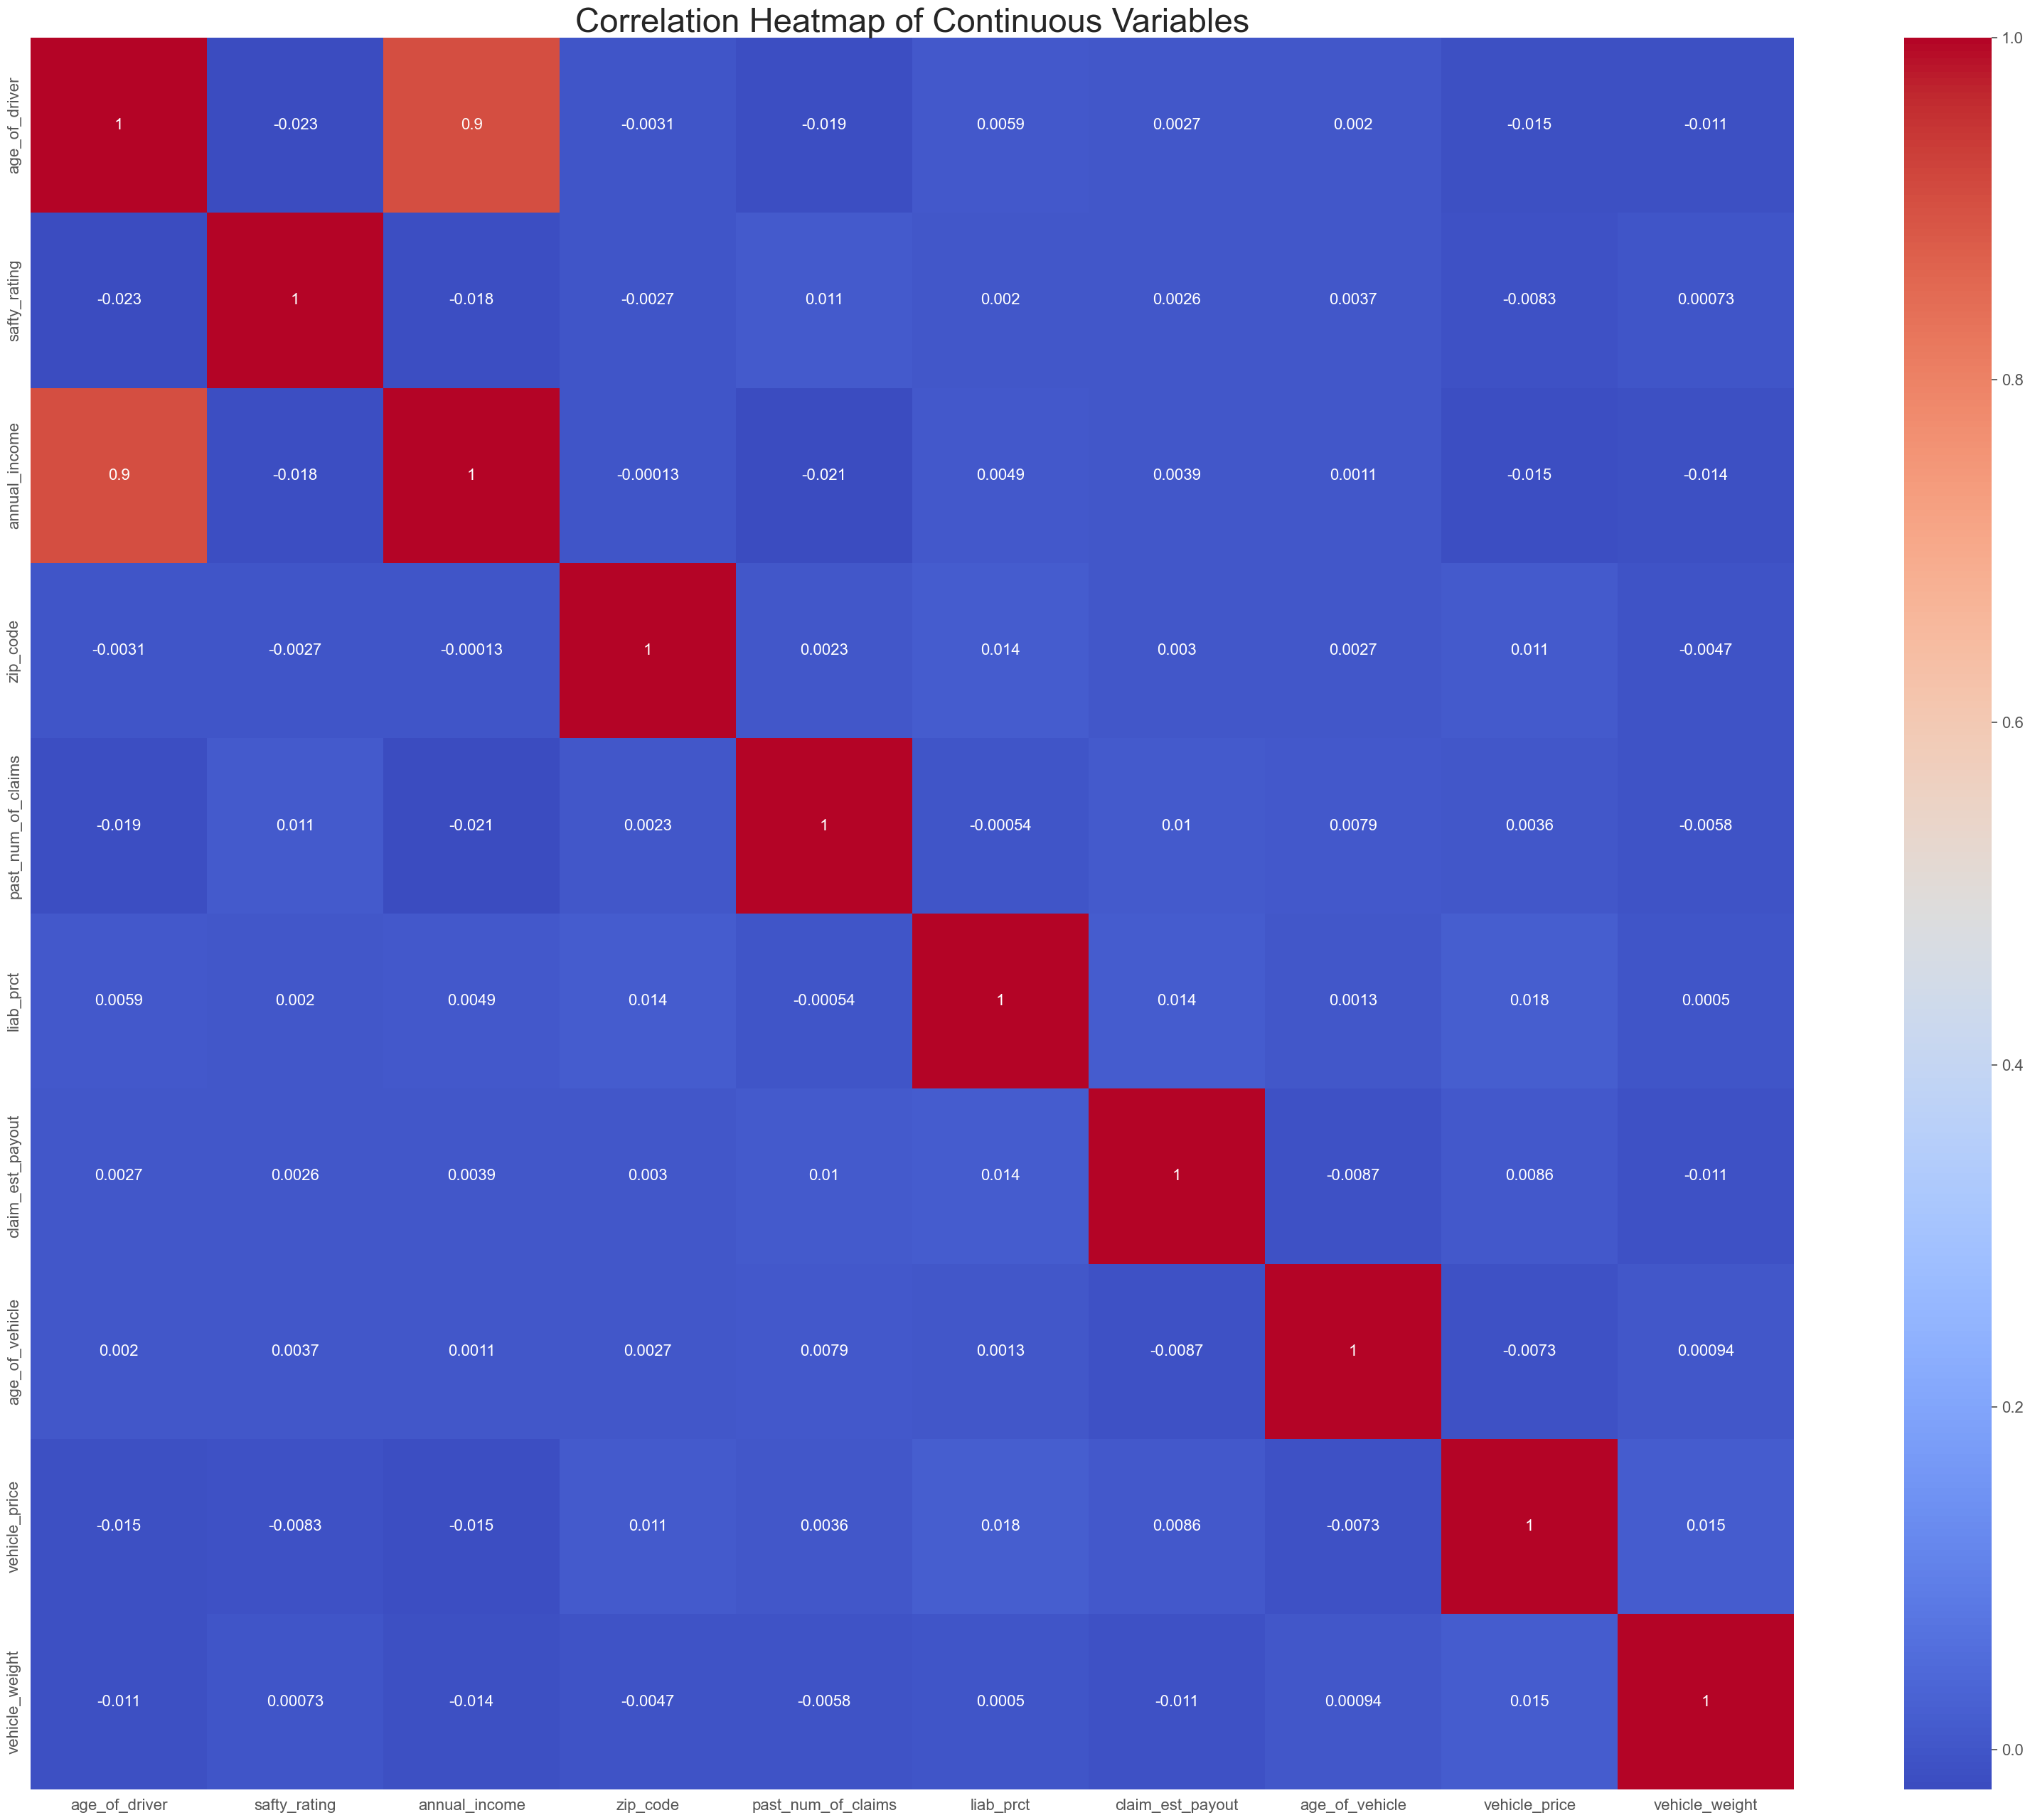

In [298]:



# Set the context to increase font size
sns.set_context("notebook", rc={"font.size":30, "axes.titlesize":34, "axes.labelsize":30, "xtick.labelsize":16, "ytick.labelsize":16})

# Subset the DataFrame to include only continuous variables
continuous_vars = Continuous_Variables_in_X_train
subset_train = train[continuous_vars]

# Calculate the correlation matrix for the subset of continuous variables
correlation_matrix = subset_train.corr()

# Create the heatmap with a specified color map
plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, fmt='.2g', annot=True, annot_kws={"size": 16}, cmap='coolwarm')  # Change 'coolwarm' to your preferred colormap
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()


In [299]:

# Now calculate the correlation
correlation_matrix =correlation_matrix = subset_train.corr()
correlation_matrix



,age_of_driver,safty_rating,annual_income,zip_code,past_num_of_claims,liab_prct,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
age_of_driver,1.000000,-0.023199,0.904245,-0.003144,-0.018840,0.005886,0.002739,0.002043,-0.014681,-0.011443
safty_rating,-0.023199,1.000000,-0.018292,-0.002668,0.010888,0.002040,0.002632,0.003684,-0.008332,0.000733
annual_income,0.904245,-0.018292,1.000000,-0.000126,-0.020788,0.004912,0.003891,0.001062,-0.015299,-0.014024
zip_code,-0.003144,-0.002668,-0.000126,1.000000,0.002348,0.013521,0.002976,0.002695,0.011195,-0.004661
past_num_of_claims,-0.018840,0.010888,-0.020788,0.002348,1.000000,-0.000536,0.010446,0.007948,0.003587,-0.005814
liab_prct,0.005886,0.002040,0.004912,0.013521,-0.000536,1.000000,0.014183,0.001325,0.017608,0.000504
claim_est_payout,0.002739,0.002632,0.003891,0.002976,0.010446,0.014183,1.000000,-0.008737,0.008627,-0.010587
age_of_vehicle,0.002043,0.003684,0.001062,0.002695,0.007948,0.001325,-0.008737,1.000000,-0.007283,0.000939
vehicle_price,-0.014681,-0.008332,-0.015299,0.011195,0.003587,0.017608,0.008627,-0.007283,1.000000,0.014726
vehicle_weight,-0.011443,0.000733,-0.014024,-0.004661,-0.005814,0.000504,-0.010587,0.000939,0.014726,1.000000


In [300]:
## Now consider the multicolinearity among catergorical variables

## Method 1 : Cramér\'s V Heatmap of Categorical Variables'

In [301]:


def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

# Convert categorical variables to dummy variables
dummies = pd.get_dummies(train[Categorical_Variables_in_X_train])

# Compute Cramér's V for all pairs
variables = dummies.columns
cramers_v_matrix = pd.DataFrame(index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        cramers_v_matrix.loc[var1, var2] = cramers_v(dummies[var1], dummies[var2])

cramers_v_matrix = cramers_v_matrix.astype(float)
cramers_v_matrix

,gender,marital_status,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,witness_present_ind,channel,policy_report_filed_ind,vehicle_category,vehicle_color
gender,0.999860,0.010239,0.002549,0.004412,0.009898,0.016423,0.008898,0.006036,0.015290,0.011938,0.013902,0.013490
marital_status,0.010239,0.999829,0.000000,0.003586,0.014417,0.017872,0.011372,0.000087,0.027043,0.001160,0.013528,0.007033
high_education_ind,0.002549,0.000000,0.999833,0.006758,0.024275,0.017175,0.017512,0.005297,0.008236,0.000369,0.008475,0.019588
address_change_ind,0.004412,0.003586,0.006758,0.999857,0.004015,0.020556,0.010879,0.007254,0.007410,0.004906,0.016535,0.026758
living_status,0.009898,0.014417,0.024275,0.004015,0.999858,0.015226,0.010759,0.013393,0.191003,0.024243,0.013131,0.027751
claim_day_of_week,0.016423,0.017872,0.017175,0.020556,0.015226,1.000000,0.017475,0.022561,0.022501,0.023139,0.014986,0.021636
accident_site,0.008898,0.011372,0.017512,0.010879,0.010759,0.017475,1.000000,0.164556,0.010501,0.012392,0.016179,0.019792
witness_present_ind,0.006036,0.000087,0.005297,0.007254,0.013393,0.022561,0.164556,0.999803,0.007249,0.067001,0.010368,0.015611
channel,0.015290,0.027043,0.008236,0.007410,0.191003,0.022501,0.010501,0.007249,1.000000,0.005464,0.010310,0.017696
policy_report_filed_ind,0.011938,0.001160,0.000369,0.004906,0.024243,0.023139,0.012392,0.067001,0.005464,0.999854,0.015772,0.011513


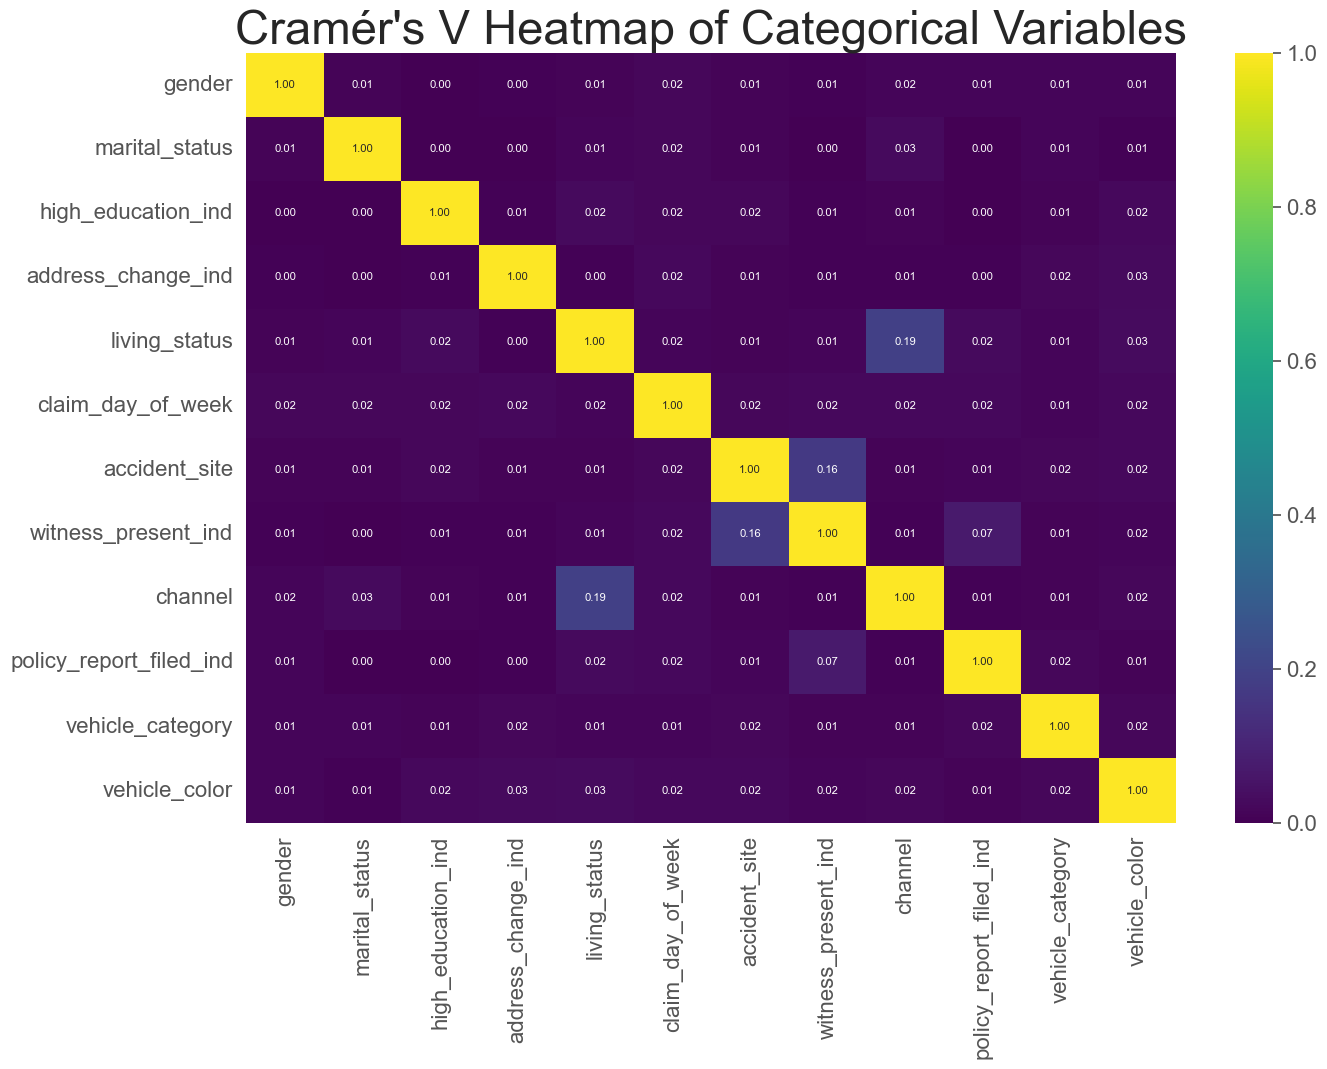

In [302]:
# Create a heatmap to visualize Cramér's V matrix with annotated values and reduced font size
plt.figure(figsize=(15, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f',
            annot_kws={"size": 8})  # Adjust the size here
plt.title("Cramér's V Heatmap of Categorical Variables")
plt.show()

## Method 2: Spearman Correlation for catergorical variables

In [303]:

# Convert categorical variables to ordinal codes
dummies = pd.get_dummies(train[Categorical_Variables_in_X_train])

# Compute Spearman's rank correlation for all pairs
variables = dummies.columns
spearman_corr_matrix = pd.DataFrame(index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        # Convert to ordinal (numerical) if necessary
        spearman_corr, _ = spearmanr(dummies[var1], dummies[var2])
        spearman_corr_matrix.loc[var1, var2] = spearman_corr

spearman_corr_matrix = spearman_corr_matrix.astype(float)
spearman_corr_matrix


,gender,marital_status,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,witness_present_ind,channel,policy_report_filed_ind,vehicle_category,vehicle_color
gender,1.000000,0.010394,0.002702,-0.004554,0.010039,-0.005009,-0.007946,0.006203,0.015272,0.012082,-0.009476,-0.009781
marital_status,0.010394,1.000000,0.000017,0.003743,-0.014573,-0.008726,0.006847,-0.000271,0.006029,-0.001318,0.013141,0.002871
high_education_ind,0.002702,0.000017,1.000000,0.006913,-0.024430,-0.003285,-0.007370,-0.005478,-0.008225,0.000526,0.000155,0.013513
address_change_ind,-0.004554,0.003743,0.006913,1.000000,-0.004158,-0.001024,0.000258,-0.007422,-0.005684,-0.005051,-0.015914,0.008145
living_status,0.010039,-0.014573,-0.024430,-0.004158,1.000000,-0.001585,-0.006876,0.013560,0.045828,0.024387,0.012967,0.016487
claim_day_of_week,-0.005009,-0.008726,-0.003285,-0.001024,-0.001585,1.000000,-0.002705,-0.001481,-0.007037,0.007066,0.006891,-0.001369
accident_site,-0.007946,0.006847,-0.007370,0.000258,-0.006876,-0.002705,1.000000,-0.148597,0.002202,-0.011019,0.010847,-0.004664
witness_present_ind,0.006203,-0.000271,-0.005478,-0.007422,0.013560,-0.001481,-0.148597,1.000000,0.004328,0.067170,-0.010259,0.002000
channel,0.015272,0.006029,-0.008225,-0.005684,0.045828,-0.007037,0.002202,0.004328,1.000000,0.005250,0.006614,-0.013918
policy_report_filed_ind,0.012082,-0.001318,0.000526,-0.005051,0.024387,0.007066,-0.011019,0.067170,0.005250,1.000000,0.015291,0.002852


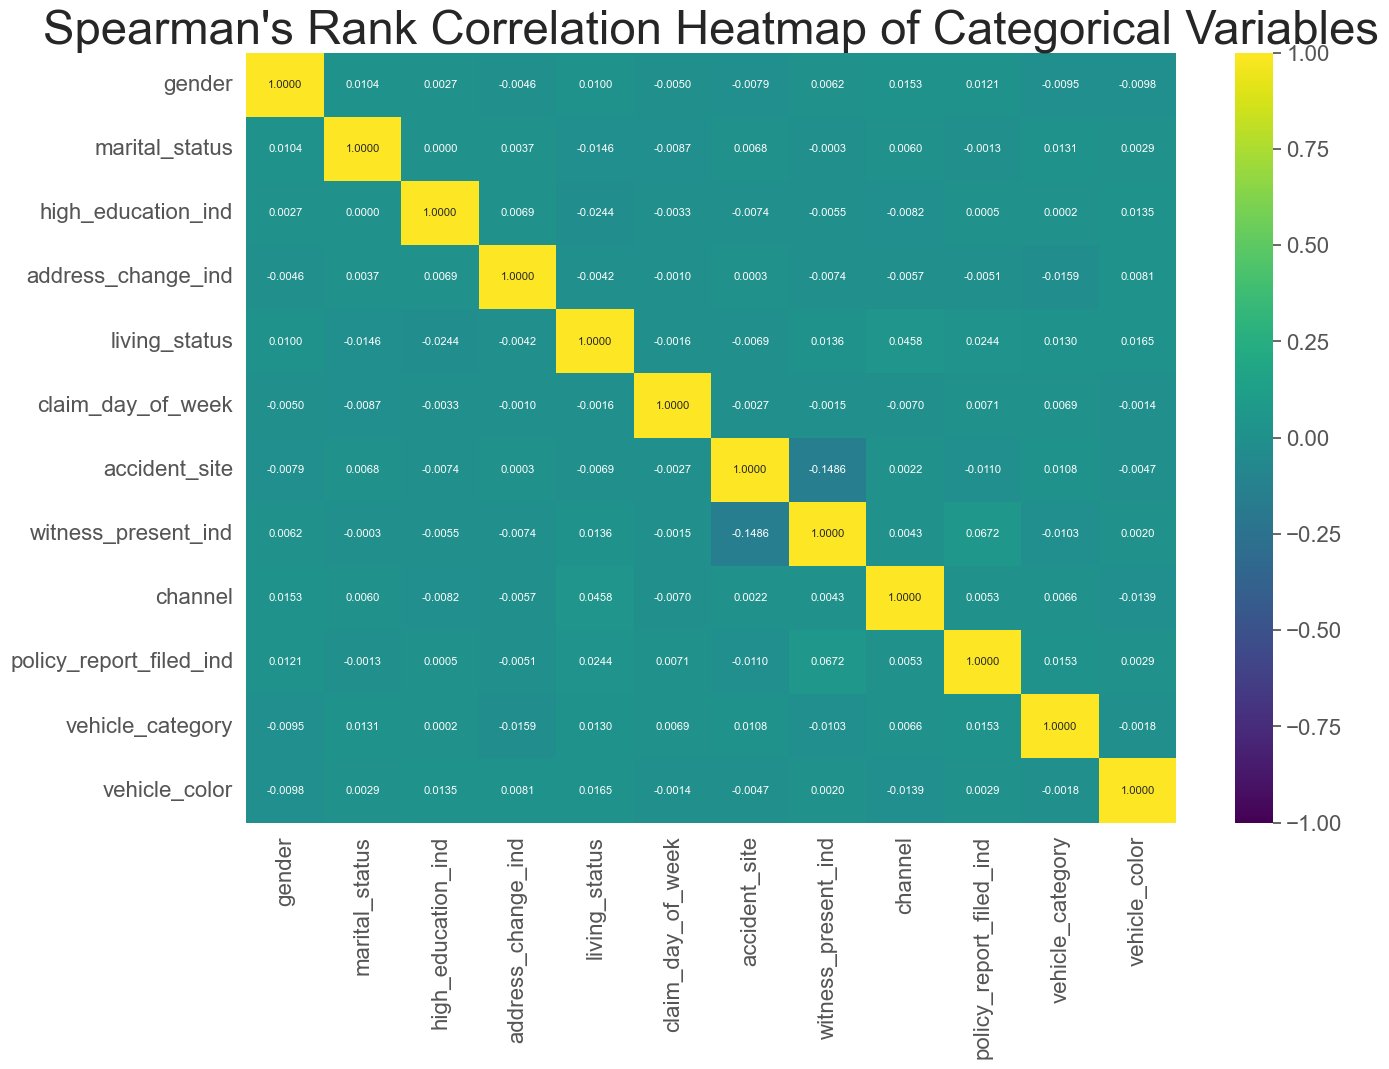

In [304]:
# Create a heatmap to visualize Spearman's rank correlation matrix with annotated values
plt.figure(figsize=(15, 10))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.4f', annot_kws={"size": 8})
plt.title("Spearman's Rank Correlation Heatmap of Categorical Variables")
plt.show()

## Theil's U (Theil's U Statistic)

In [305]:



def conditional_entropy(x, y):
    # Calculate the conditional entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy_xy = 0.0
    
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy_xy += p_xy * np.log(p_y / p_xy)
    
    return entropy_xy

def theils_u(x, y):
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


In [306]:
# Convert categorical variables to dummy variables
dummies = train[Categorical_Variables_in_X_train]

# Compute Theil's U for all pairs
variables = dummies.columns
theils_u_matrix = pd.DataFrame(index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        theils_u_matrix.loc[var1, var2] = theils_u(dummies[var1], dummies[var2])

theils_u_matrix = theils_u_matrix.astype(float)
theils_u_matrix

,gender,marital_status,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,witness_present_ind,channel,policy_report_filed_ind,vehicle_category,vehicle_color
gender,1.000000,7.801482e-05,5.273291e-06,0.000015,0.000073,0.000195,0.000057,2.779949e-05,0.000169,1.054224e-04,0.000140,0.000131
marital_status,0.000090,1.000000e+00,2.320592e-10,0.000012,0.000177,0.000265,0.000107,6.110046e-08,0.000602,1.447297e-06,0.000153,0.000041
high_education_ind,0.000006,2.285365e-10,1.000000e+00,0.000039,0.000489,0.000241,0.000253,2.456937e-05,0.000056,2.265839e-07,0.000059,0.000314
address_change_ind,0.000015,1.027134e-05,3.502851e-05,1.000000,0.000013,0.000310,0.000087,4.037228e-05,0.000040,1.871585e-05,0.000200,0.000526
living_status,0.000073,1.544674e-04,4.338755e-04,0.000013,1.000000,0.000169,0.000084,1.337070e-04,0.026616,4.333744e-04,0.000125,0.000561
claim_day_of_week,0.000069,8.175290e-05,7.557980e-05,0.000109,0.000060,1.000000,0.000158,1.311656e-04,0.000257,1.373213e-04,0.000116,0.000719
accident_site,0.000038,6.201858e-05,1.484088e-04,0.000057,0.000056,0.000296,1.000000,1.415914e-02,0.000106,7.386865e-05,0.000252,0.000380
witness_present_ind,0.000036,6.784854e-08,2.770338e-05,0.000051,0.000170,0.000472,0.027191,1.000000e+00,0.000049,4.231596e-03,0.000100,0.000225
channel,0.000119,3.686988e-04,3.454592e-05,0.000028,0.018635,0.000510,0.000112,2.678924e-05,1.000000,1.521898e-05,0.000108,0.000320
policy_report_filed_ind,0.000108,1.290133e-06,2.050919e-07,0.000019,0.000442,0.000397,0.000114,3.396917e-03,0.000022,1.000000e+00,0.000185,0.000098


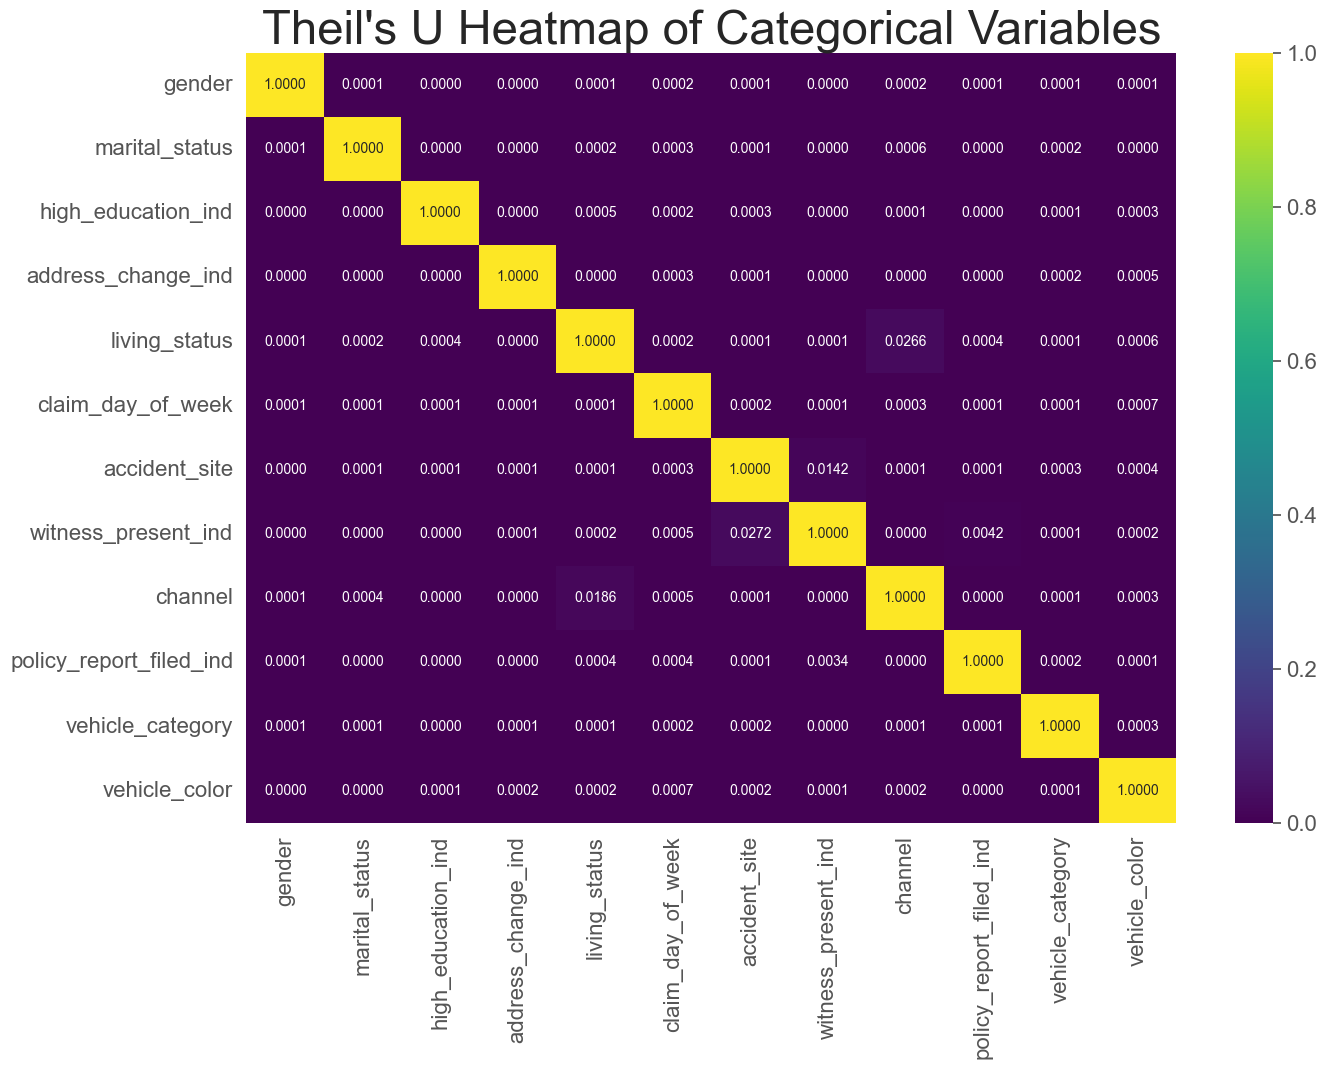

In [307]:
# Create a heatmap to visualize Theil's U matrix with annotated values
plt.figure(figsize=(15, 10))
sns.heatmap(theils_u_matrix, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.4f', annot_kws={"size": 10})
plt.title("Theil's U Heatmap of Categorical Variables")
plt.show()

## check multicolinearity for both catergorical and continous variables at the same time

In [308]:
# Assume Continuous_Variables_in_X_train is a list of your continuous variables in the DataFrame 'train'
continuous_vars = Continuous_Variables_in_X_train
continuous_corr = train[continuous_vars].corr(method='pearson')


In [309]:
# Define Theil's U functions as previously done
def conditional_entropy(x, y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy_xy = 0.0
    
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy_xy += p_xy * np.log(p_y / p_xy)
    
    return entropy_xy

def theils_u(x, y):
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

# Compute Theil's U for all pairs of categorical variables
categorical_vars = Categorical_Variables_in_X_train
theils_u_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 == var2:
            theils_u_matrix.loc[var1, var2] = 1.0
        else:
            theils_u_matrix.loc[var1, var2] = theils_u(train[var1], train[var2])

theils_u_matrix = theils_u_matrix.astype(float)


In [310]:


def point_biserial_matrix(df, continuous_vars, binary_vars):
    pb_matrix = pd.DataFrame(index=continuous_vars, columns=binary_vars)
    for cont_var in continuous_vars:
        for bin_var in binary_vars:
            pb_matrix.loc[cont_var, bin_var] = pointbiserialr(df[bin_var], df[cont_var])[0]
    return pb_matrix

binary_vars = [var for var in Categorical_Variables_in_X_train if len(train[var].unique()) == 2]
point_biserial_corr = point_biserial_matrix(train, continuous_vars, binary_vars).astype(float)


In [311]:
# Normalize the correlation values to the same range if needed
def normalize(matrix):
    return (matrix - matrix.min().min()) / (matrix.max().max() - matrix.min().min())

continuous_corr_norm = normalize(continuous_corr)
theils_u_matrix_norm = normalize(theils_u_matrix)
point_biserial_corr_norm = normalize(point_biserial_corr)

# Combine the matrices
combined_corr = pd.concat([continuous_corr_norm, point_biserial_corr_norm], axis=1)
combined_corr = pd.concat([combined_corr, theils_u_matrix_norm], axis=0)


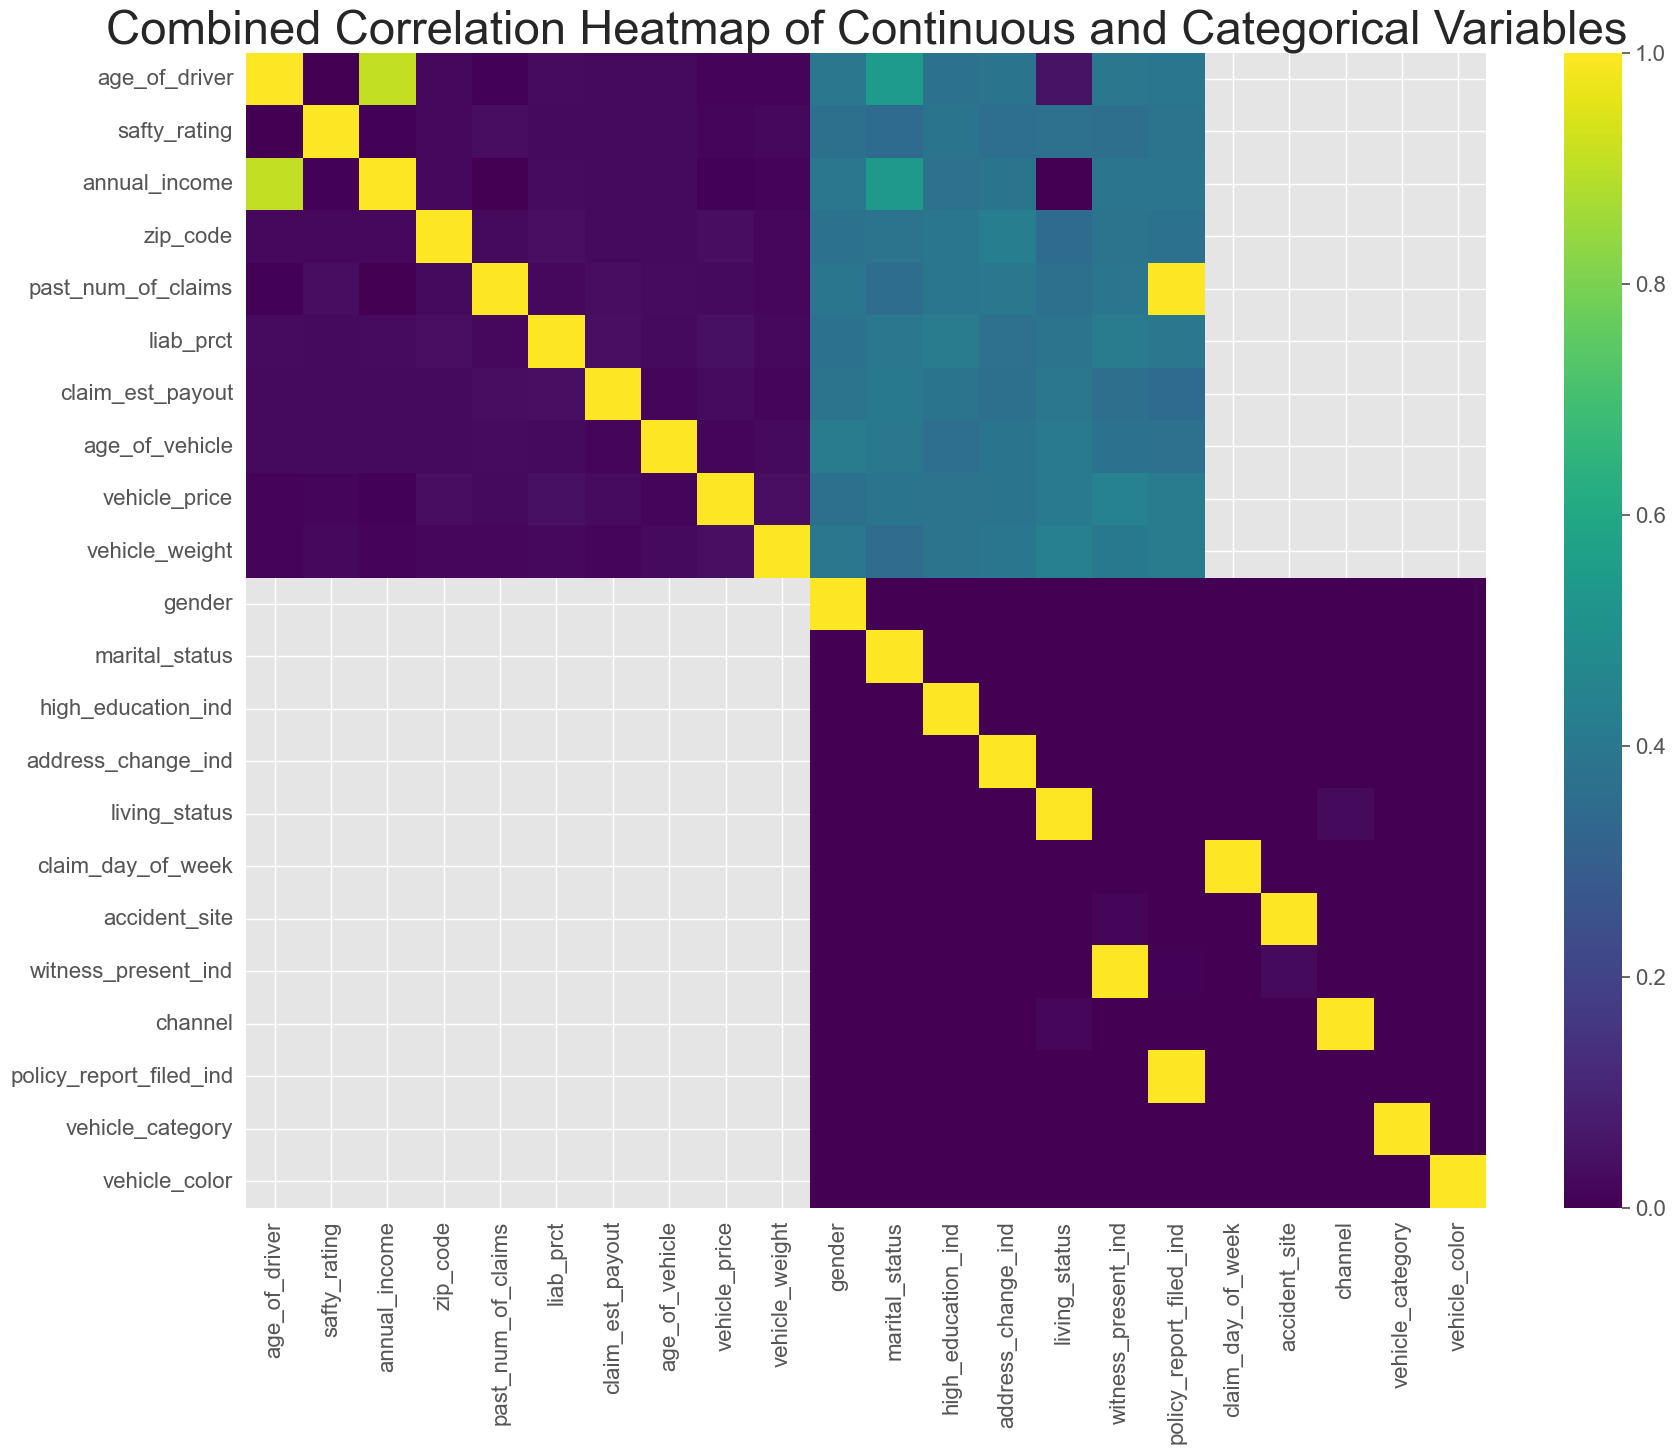

In [312]:
plt.figure(figsize=(20, 15))
sns.heatmap(combined_corr, annot=False, cmap='viridis', vmin=0, vmax=1)
plt.title('Combined Correlation Heatmap of Continuous and Categorical Variables')
plt.show()


In [313]:
combined_corr

,age_of_driver,safty_rating,annual_income,zip_code,past_num_of_claims,liab_prct,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,...,high_education_ind,address_change_ind,living_status,witness_present_ind,policy_report_filed_ind,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
age_of_driver,1.000000,0.000000,0.906416,0.019600,0.004260,0.028426,0.025349,0.024669,0.008325,0.011489,...,3.715410e-01,0.385045,0.046913,4.009243e-01,3.937547e-01,NaN,NaN,NaN,NaN,NaN
safty_rating,0.000000,1.000000,0.004796,0.020065,0.033314,0.024667,0.025245,0.026273,0.014530,0.023389,...,3.849397e-01,0.355691,0.368637,3.598892e-01,3.799791e-01,NaN,NaN,NaN,NaN,NaN
annual_income,0.906416,0.004796,1.000000,0.022550,0.002356,0.027473,0.026475,0.023711,0.007721,0.008966,...,3.690661e-01,0.384146,0.000000,3.899251e-01,3.890351e-01,NaN,NaN,NaN,NaN,NaN
zip_code,0.019600,0.020065,0.022550,1.000000,0.024968,0.035888,0.025581,0.025307,0.033614,0.018117,...,3.943560e-01,0.424255,0.346719,3.799865e-01,3.763177e-01,NaN,NaN,NaN,NaN,NaN
past_num_of_claims,0.004260,0.033314,0.002356,0.024968,1.000000,0.022149,0.032882,0.030440,0.026178,0.016991,...,3.942416e-01,0.398681,0.363341,3.897294e-01,1.000000e+00,NaN,NaN,NaN,NaN,NaN
liab_prct,0.028426,0.024667,0.027473,0.035888,0.022149,1.000000,0.036534,0.023968,0.039882,0.023165,...,4.115852e-01,0.370469,0.378936,4.133799e-01,4.018601e-01,NaN,NaN,NaN,NaN,NaN
claim_est_payout,0.025349,0.025245,0.026475,0.025581,0.032882,0.036534,1.000000,0.014133,0.031104,0.012326,...,3.835214e-01,0.366080,0.397552,3.604722e-01,3.442985e-01,NaN,NaN,NaN,NaN,NaN
age_of_vehicle,0.024669,0.026273,0.023711,0.025307,0.030440,0.023968,0.014133,1.000000,0.015555,0.023590,...,3.567634e-01,0.385543,0.407981,3.745680e-01,3.673083e-01,NaN,NaN,NaN,NaN,NaN
vehicle_price,0.008325,0.014530,0.007721,0.033614,0.026178,0.039882,0.031104,0.015555,1.000000,0.037065,...,3.823681e-01,0.384265,0.409911,4.415264e-01,4.126945e-01,NaN,NaN,NaN,NaN,NaN
vehicle_weight,0.011489,0.023389,0.008966,0.018117,0.016991,0.023165,0.012326,0.023590,0.037065,1.000000,...,3.802617e-01,0.391202,0.432246,4.034813e-01,4.105238e-01,NaN,NaN,NaN,NaN,NaN


## References